In [1]:
import Auto_paint_self
import numpy as np
mse=[[0.2852,0.2854],[0.2569,0.2744],[0.2019,0.2312],[0.2914,0.2350]]
pearson=[[0.8882,0.8819],[0.8883,0.8784],[0.8777,0.8722],[0.8879,0.8871]]
PSNR=[[38.2261,40.1055],[38.8380,38.4342],[40.5234,40.0011],[38.5957,41.3639]]
SSIM=[[0.7942,0.7717],[0.8192,0.8196],[0.8692,0.8632],[0.8071,0.8264]]
times=['ET_ESR','ET_MSG_SED','MSG_SED_ET','ESR_ET']

In [2]:
#bar或line图以及线性趋势和多项式拟合
def Autobar_or_line(v,times,timename,iflat,latname,lat,iflon,lonname,lon,iflevel,levelname,levels,line_or_bar,vs=None,ifself_vmax_vmin='no',selfvmax=None,selfvmin=None,linenum=1,xlabelname='x',ylabelname='y',bar_line_title='',label='y',linewidth=4,selfcolor='k',iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=20,xlabelformat='month',valuemodel='+'):
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import xarray as xr
    import math
    from matplotlib.pyplot import MultipleLocator
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error,r2_score
    from sklearn.model_selection import train_test_split
    from scipy import signal
    import lanczos
    import matplotlib as mpl
    
    plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文
    plt.rcParams['axes.unicode_minus']=False #正常显示正负号
    mpl.rc('axes',lw=2)
    ym = []
    yf = []
    regressline = []
    yd = []
    if iflat!='no':
        lat = np.array(lat)
    if iflon !='no':
        lon = np.array(lon)
    if iflevel !='no' and iflevel !='yes':
        levels = np.array(levels)
    v = np.array(v)
    times = np.array(times)
    if line_or_bar != 'onlydata' and line_or_bar !='scatter':
        fig = plt.figure(figsize = (12,8),facecolor='white')
        ax = fig.add_subplot(111)
        x_major_locator=MultipleLocator(xspace)
        ax.xaxis.set_major_locator(x_major_locator)
        if valuemodel =='+' or valuemodel =='-':
            if ifself_vmax_vmin=='yes':
                ax.set_ylim(selfvmin,selfvmax)
            else:
                if np.nanmax(v)>=0.1 or np.nanmin(v)<=-0.1:
                    ax.set_ylim(math.floor(np.nanmin(v)),math.ceil(np.nanmax(v)))
                else:
                    ax.set_ylim(np.nanmin(v),np.nanmax(v))
        elif valuemodel == '+-' or valuemodel =='-+':
            if ifself_vmax_vmin=='yes':
                ax.set_ylim(selfvmin,selfvmax)
            else:
                if np.nanmax(v)>=0.1 or np.nanmin(v)<=-0.1:
                    if np.abs(np.nanmin(v))> np.abs(np.nanmax(v)):
                        ax.set_ylim(math.floor(np.nanmin(v)),math.ceil(-np.nanmin(v)))
                    else:
                        ax.set_ylim(math.floor(-np.nanmax(v)),math.ceil(np.nanmax(v)))
                else:
                    if np.abs(np.nanmin(v))> np.abs(np.nanmax(v)):
                        ax.set_ylim(np.nanmin(v),-np.nanmin(v))
                    else:
                        ax.set_ylim(-np.nanmax(v),np.nanmax(v))
        time1 = []
        for i in range(len(times)):
            if xlabelformat =='year':
                time1.append(pd.to_datetime(str(np.array(times[i]))).strftime('%Y'))
            elif xlabelformat =='month':
                time1.append(pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m'))
            elif xlabelformat == 'day':
                time1.append(pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d'))
            else:
                time1.append(times[i])
        if linenum == 1:
            color = []
            if (line_or_bar) == 'bar' and (selfcolor != None):
                b1 = ax.bar(time1,v,color = selfcolor,label = label)
            elif (line_or_bar) == 'bar' and (selfcolor==None):
                for i in range (0,len(v)):
                    if (v[i] >= 0):
                        color.append('red')
                    elif (v[i] <= 0):
                        color.append('blue')
                b1 = ax.bar(time1,v,color = color,label = label)
            elif line_or_bar == 'line':
                l1 = ax.plot(time1,v,selfcolor,linewidth = linewidth,label = label)
            elif line_or_bar == 'lineandbar':
                for i in range(0,len(v)):
                    if (v[i] >= 0):
                        color.append('red')
                    elif (v[i] <0):
                        color.append('blue')
                b1 = ax.bar(time1,v,color = color,label = label)
                l1 = ax.plot(time1,v,selfcolor,linewidth = linewidth,label = label)
        else:
            if line_or_bar=='line':
                for i in range(v.shape[0]):
                    if line_or_bar == 'line':
                        l1 = ax.plot(time1,v[i],selfcolor[i],linewidth = linewidth,label = label[i])
            elif line_or_bar=='bar':
                bar_width = 0.8 / v.shape[1]
                x=np.arange(np.array(v).shape[0])
                for i in range(np.array(v[0]).shape[0]):
                    offset=(i - (v.shape[1] - 1) / 2) * bar_width
                    y=[vs[i] for vs in v]
                    b1=ax.bar(x+offset,y,width=bar_width,label=label[i],color=selfcolor[i])
                plt.xticks(x,time1)
    elif line_or_bar == 'scatter':
        fig = plt.figure(figsize = (12,8),facecolor='white')
        ax = fig.add_subplot(111)
        if valuemodel =='+' or valuemodel =='-':
            if ifself_vmax_vmin=='yes':
                ax.set_ylim(selfvmin[1],selfvmax[1])
                ax.set_xlim(selfvmin[0],selfvmax[0])
            else:
                if np.nanmax(v)>=0.1 or np.nanmin(v)<=-0.1:
                    ax.set_xlim(math.floor(np.nanmin(v)),math.ceil(np.nanmax(v)))
                    ax.set_ylim(math.floor(np.nanmin(vs)),math.ceil(np.nanmax(vs)))
                else:
                    ax.set_xlim(np.nanmin(v),np.nanmax(v))
                    ax.set_ylim(np.nanmin(vs),np.nanmax(vs))
        elif valuemodel == '+-' or valuemodel =='-+':
            if ifself_vmax_vmin=='yes':
                if np.abs(selfvmin[1])>np.abs(selfvmax[1]):
                    ax.set_ylim(selfvmin[1],-selfvmin[1])
                else:
                    ax.set_ylim(-selfvmax[1],selfvmax[1])
                if np.abs(selfvmin[0])>np.abs(selfvmax[0]):
                    ax.set_xlim(selfvmin[0],-selfvmin[0])
                else:
                    ax.set_xlim(-selfvmax[0],selfvmax[0])
            else:
                if np.nanmax(v)>=0.1 or np.nanmin(v)<=-0.1:
                    if np.abs(np.nanmin(v))> np.abs(np.nanmax(v)):
                        ax.set_xlim(math.floor(np.nanmin(v)),math.ceil(-np.nanmin(v)))
                    else:
                        ax.set_xlim(math.floor(-np.nanmax(v)),math.ceil(np.nanmax(v)))
                else:
                    if np.abs(np.nanmin(v))> np.abs(np.nanmax(v)):
                        ax.set_xlim(np.nanmin(v),-np.nanmin(v))
                    else:
                        ax.set_xlim(-np.nanmax(v),np.nanmax(v))
                if np.nanmax(vs)>=0.1 or np.nanmin(vs)<=-0.1:
                    if np.abs(np.nanmin(vs))> np.abs(np.nanmax(vs)):
                        ax.set_ylim(math.floor(np.nanmin(vs)),math.ceil(-np.nanmin(vs)))
                    else:
                        ax.set_ylim(math.floor(-np.nanmax(vs)),math.ceil(np.nanmax(vs)))
                else:
                    if np.abs(np.nanmin(vs))> np.abs(np.nanmax(vs)):
                        ax.set_ylim(np.nanmin(vs),-np.nanmin(vs))
                    else:
                        ax.set_ylim(-np.nanmax(vs),np.nanmax(vs))
        s1 = ax.scatter(v,vs,c=selfcolor)
    else:
        time1=times
    if (iftend == 'yes' and linenum == 1) or (iftend == 'yes' and line_or_bar == 'scatter'):
        solver = LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1)
        if line_or_bar != 'scatter':
            time2 = np.arange(0,len(times))
            time2=time2[np.logical_not(np.isnan(v))]
            v=v[np.logical_not(np.isnan(v))]
            time2 = time2.reshape(-1,1)
            model = solver.fit(time2,v)
            regressline = solver.predict(time2)
            regressline = np.array(regressline)
        else:
            v = np.array(v)
            vs=vs[np.logical_not(np.isnan(v))]
            v=v[np.logical_not(np.isnan(v))]
            v=v[np.logical_not(np.isnan(vs))]
            vs=vs[np.logical_not(np.isnan(vs))]
            v = v.reshape(-1,1)
            model = solver.fit(v,vs)
            regressline = solver.predict(v)
            regressline = np.array(regressline)
        if line_or_bar != 'onlydata':
            if line_or_bar != 'scatter':
                l2 = ax.plot(time1,regressline,'r-',linewidth = 4,label = '趋势线')
            else:
                l2 = ax.plot(v,regressline,'r-',linewidth = 4,label = '趋势线')
    elif iftend == 'area':
        solver = LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1)
        time2 = np.arange(0,len(times)).reshape(-1,1)
        if iflevel =='yes' or iflevel =='no':
            if iflat !='no':
                if iflon !='no':
                    regressline = np.zeros((v.shape[1],v.shape[2]))
                    time3 = time2
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]): 
                            time2 = time3
                            v1 = v[:,i,j]
                            time2=time2[np.logical_not(np.isnan(v1))]
                            v1=v1[np.logical_not(np.isnan(v1))]
                            if len(time2)>=2:
                                model = solver.fit(time2,v1)
                                regresslines = solver.predict(time2)
                                regressline[i,j]=(regresslines[1]-regresslines[0])/(time2[1]-time2[0])
                            else:
                                regressline[i,j]=np.nan
                else:
                    regressline = np.zeros((v.shape[1]))
                    time3 = time2
                    for i in range(v.shape[1]):
                        time2 = time3
                        v1 = v[:,i]
                        time2=time2[np.logical_not(np.isnan(v1))]
                        v1=v1[np.logical_not(np.isnan(v1))]
                        if len(time2)>=2:
                            model = solver.fit(time2,v1)
                            regresslines = solver.predict(time2)
                            regressline[i]=(regresslines[1]-regresslines[0])/(time2[1]-time2[0])
                        else:
                            regressline[i]=np.nan
            else:
                if iflon !='no':
                    regressline = np.zeros((v.shape[1]))
                    time3 = time2
                    for i in range(v.shape[1]):
                        time2 = time3
                        v1 = v[:,i]
                        time2=time2[np.logical_not(np.isnan(v1))]
                        v1=v1[np.logical_not(np.isnan(v1))]
                        if len(time2)>=2:
                            model = solver.fit(time2,v1)
                            regresslines = solver.predict(time2)
                            regressline[i]=(regresslines[1]-regresslines[0])/(time2[1]-time2[0])
                        else:
                            regressline[i]=np.nan
                else:
                    print("请使用参数iftend == 'yes'")
        else:
            if iflat !='no':
                if iflon !='no':
                    regressline = np.zeros((v.shape[1],v.shape[2],v.shape[3]))
                    time3 = time2
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]): 
                            for k in range(v.shape[3]):
                                time2 = time3
                                v1 = v[:,i,j,k]
                                time2=time2[np.logical_not(np.isnan(v1))]
                                v1=v1[np.logical_not(np.isnan(v1))]
                                if len(time2)>=2:
                                    model = solver.fit(time2,v1)
                                    regresslines = solver.predict(time2)
                                    regressline[i,j,k]=(regresslines[1]-regresslines[0])/(time2[1]-time2[0])
                                else:
                                    regressline[i,j,k]=np.nan
                else:
                    regressline = np.zeros((v.shape[1],v.shape[2]))
                    time3 = time2
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]): 
                            time2 = time3
                            v1 = v[:,i,j]
                            time2=time2[np.logical_not(np.isnan(v1))]
                            v1=v1[np.logical_not(np.isnan(v1))]
                            if len(time2)>=2:
                                model = solver.fit(time2,v1)
                                regresslines = solver.predict(time2)
                                regressline[i,j]=(regresslines[1]-regresslines[0])/(time2[1]-time2[0])
                            else:
                                regressline[i,j]=np.nan
            else:
                if iflon !='no':
                    regressline = np.zeros((v.shape[1],v.shape[2]))
                    time3 = time2
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]): 
                            time2 = time3
                            v1 = v[:,i,j]
                            time2=time2[np.logical_not(np.isnan(v1))]
                            v1=v1[np.logical_not(np.isnan(v1))]
                            if len(time2)>=2:
                                model = solver.fit(time2,v1)
                                regresslines = solver.predict(time2)
                                regressline[i,j]=(regresslines[1]-regresslines[0])/(time2[1]-time2[0])
                            else:
                                regressline[i,j]=np.nan
                else:
                    regressline = np.zeros((v.shape[1]))
                    time3 = time2
                    for i in range(v.shape[1]):
                        time2 = time3
                        v1 = v[:,i]
                        time2=time2[np.logical_not(np.isnan(v1))]
                        v1=v1[np.logical_not(np.isnan(v1))]
                        if len(time2)>=2:
                            model = solver.fit(time2,v1)
                            regresslines = solver.predict(time2)
                            regressline[i]=(regresslines[1]-regresslines[0])/(time2[1]-time2[0])
                        else:
                            regressline[i]=np.nan
        if iflevel =='yes' or iflevel == 'no':
            if iflat !='no':
                if iflon !='no':
                    regressline = xr.DataArray(regressline,[(latname,lat),(lonname,lon)])
                else:
                    regressline = xr.DataArray(regressline,[(latname,lat),])
            else:
                if iflon!='no':
                    regressline = xr.DataArray(regressline,[(lonname,lon)])
                else:
                    print("请使用参数iftend == 'yes'")
                    regressline = None
        else:
            if iflat !='no':
                if iflon !='no':
                    regressline = xr.DataArray(regressline,[(levelname,levels),(latname,lat),(lonname,lon)])
                else:
                    regressline = xr.DataArray(regressline,[(levelname,levels),(latname,lat),])
            else:
                if iflon!='no':
                    regressline = xr.DataArray(regressline,[(levelname,levels),(lonname,lon)])
                else:
                    regressline = xr.DataArray(regressline,[(levelname,levels)])
    if ifmultitend == 'yes' and linenum == 1:
        X = np.arange(0,len(times)).reshape(-1,1)
        y = v
        if not(np.isnan(y).any()):
            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
            rmses = []
            degrees = np.arange(1, 10)
            min_rmse, min_deg,score = 1e10, 0 ,0

            for deg in degrees:
                # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                poly = PolynomialFeatures(degree=deg, include_bias=False)
                x_train_poly = poly.fit_transform(x_train)

                # 多项式拟合
                poly_reg = LinearRegression()
                poly_reg.fit(x_train_poly, y_train)
                #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                # 测试集比较
                x_test_poly = poly.fit_transform(x_test)
                y_test_pred = poly_reg.predict(x_test_poly)

                #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                rmses.append(poly_rmse)
                # r2 范围[0，1]，R2越接近1拟合越好。
                r2score = r2_score(y_test, y_test_pred)

                # degree交叉验证
                if min_rmse > poly_rmse:
                    min_rmse = poly_rmse
                    min_deg = deg
                    score = r2score
            time2 = np.arange(0,len(times))
            ymss = np.polyfit(time2,y,min_deg)
            yms= np.poly1d(ymss)
            ym=yms(time2)
            ym = np.array(ym)
        else:
            ym = np.zeros((v.shape[0]))
            ym[:] = np.nan
        if line_or_bar != 'onlydata':
            l3 = ax.plot(time1,ym,'p-',linewidth = 4,label = '多项式拟合')
    elif ifmultitend == 'area':
        if iflevel == 'yes' or iflevel == 'no':
            if iflat !='no':
                if iflon !='no':
                    ym = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            X = np.arange(0,len(times)).reshape(-1,1)
                            y = v[:,i,j]
                            if not(np.isnan(y).any()):
                                x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                rmses = []
                                degrees = np.arange(1, 10)
                                min_rmse, min_deg,score = 1e10, 0 ,0

                                for deg in degrees:
                                    # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                                    poly = PolynomialFeatures(degree=deg, include_bias=False)
                                    x_train_poly = poly.fit_transform(x_train)

                                    # 多项式拟合
                                    poly_reg = LinearRegression()
                                    poly_reg.fit(x_train_poly, y_train)
                                    #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                                    # 测试集比较
                                    x_test_poly = poly.fit_transform(x_test)
                                    y_test_pred = poly_reg.predict(x_test_poly)

                                    #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                                    poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                    rmses.append(poly_rmse)
                                    # r2 范围[0，1]，R2越接近1拟合越好。
                                    r2score = r2_score(y_test, y_test_pred)

                                    # degree交叉验证
                                    if min_rmse > poly_rmse:
                                        min_rmse = poly_rmse
                                        min_deg = deg
                                        score = r2score
                                time2 = np.arange(0,len(times))
                                ymsss = np.polyfit(time2,y,min_deg)
                                ymss= np.poly1d(ymsss)
                                yms=ymss(time2)
                                yms = np.array(yms)
                                ym[:,i,j] = yms
                            else:
                                ym[:,i,j] = np.nan
                else:
                    ym = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        X = np.arange(0,len(times)).reshape(-1,1)
                        y = v[:,i]
                        if not(np.isnan(y).any()):
                            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                            rmses = []
                            degrees = np.arange(1, 10)
                            min_rmse, min_deg,score = 1e10, 0 ,0

                            for deg in degrees:
                                # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                                poly = PolynomialFeatures(degree=deg, include_bias=False)
                                x_train_poly = poly.fit_transform(x_train)

                                # 多项式拟合
                                poly_reg = LinearRegression()
                                poly_reg.fit(x_train_poly, y_train)
                                #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                                # 测试集比较
                                x_test_poly = poly.fit_transform(x_test)
                                y_test_pred = poly_reg.predict(x_test_poly)

                                #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                                poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                rmses.append(poly_rmse)
                                # r2 范围[0，1]，R2越接近1拟合越好。
                                r2score = r2_score(y_test, y_test_pred)

                                # degree交叉验证
                                if min_rmse > poly_rmse:
                                    min_rmse = poly_rmse
                                    min_deg = deg
                                    score = r2score
                            time2 = np.arange(0,len(times))
                            ymsss = np.polyfit(time2,y,min_deg)
                            ymss= np.poly1d(ymsss)
                            yms=ymss(time2)
                            yms = np.array(yms)
                            ym[:,i] = yms
                        else:
                            ym[:,i] = np.nan
            else:
                if iflon !='no':
                    ym = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        X = np.arange(0,len(times)).reshape(-1,1)
                        y = v[:,i]
                        if not(np.isnan(y).any()):
                            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                            rmses = []
                            degrees = np.arange(1, 10)
                            min_rmse, min_deg,score = 1e10, 0 ,0

                            for deg in degrees:
                                # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                                poly = PolynomialFeatures(degree=deg, include_bias=False)
                                x_train_poly = poly.fit_transform(x_train)

                                # 多项式拟合
                                poly_reg = LinearRegression()
                                poly_reg.fit(x_train_poly, y_train)
                                #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                                # 测试集比较
                                x_test_poly = poly.fit_transform(x_test)
                                y_test_pred = poly_reg.predict(x_test_poly)

                                #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                                poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                rmses.append(poly_rmse)
                                # r2 范围[0，1]，R2越接近1拟合越好。
                                r2score = r2_score(y_test, y_test_pred)

                                # degree交叉验证
                                if min_rmse > poly_rmse:
                                    min_rmse = poly_rmse
                                    min_deg = deg
                                    score = r2score
                            time2 = np.arange(0,len(times))
                            ymsss = np.polyfit(time2,y,min_deg)
                            ymss= np.poly1d(ymsss)
                            yms=ymss(time2)
                            yms = np.array(yms)
                            ym[:,i] = yms
                        else:
                            ym[:,i] = np.nan
                else:
                    print("请使用参数ifmultitend == 'yes'")
        else:
            if iflat !='no':
                if iflon !='no':
                    ym = np.zeros((v.shape[0],v.shape[1],v.shape[2],v.shape[3]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            for k in range(v.shape[3]):
                                X = np.arange(0,len(times)).reshape(-1,1)
                                y = v[:,i,j,k]
                                if not(np.isnan(y).any()):
                                    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                    rmses = []
                                    degrees = np.arange(1, 10)
                                    min_rmse, min_deg,score = 1e10, 0 ,0

                                    for deg in degrees:
                                        # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                                        poly = PolynomialFeatures(degree=deg, include_bias=False)
                                        x_train_poly = poly.fit_transform(x_train)

                                        # 多项式拟合
                                        poly_reg = LinearRegression()
                                        poly_reg.fit(x_train_poly, y_train)
                                        #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                                        # 测试集比较
                                        x_test_poly = poly.fit_transform(x_test)
                                        y_test_pred = poly_reg.predict(x_test_poly)

                                        #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                                        poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                        rmses.append(poly_rmse)
                                        # r2 范围[0，1]，R2越接近1拟合越好。
                                        r2score = r2_score(y_test, y_test_pred)

                                        # degree交叉验证
                                        if min_rmse > poly_rmse:
                                            min_rmse = poly_rmse
                                            min_deg = deg
                                            score = r2score
                                    time2 = np.arange(0,len(times))
                                    ymsss = np.polyfit(time2,y,min_deg)
                                    ymss= np.poly1d(ymsss)
                                    yms=ymss(time2)
                                    yms = np.array(yms)
                                    ym[:,i,j,k] = yms
                                else:
                                    ym[:,i,j,k] = np.nan
                else:
                    ym = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            X = np.arange(0,len(times)).reshape(-1,1)
                            y = v[:,i,j]
                            if not(np.isnan(y).any()):
                                x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                rmses = []
                                degrees = np.arange(1, 10)
                                min_rmse, min_deg,score = 1e10, 0 ,0

                                for deg in degrees:
                                    # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                                    poly = PolynomialFeatures(degree=deg, include_bias=False)
                                    x_train_poly = poly.fit_transform(x_train)

                                    # 多项式拟合
                                    poly_reg = LinearRegression()
                                    poly_reg.fit(x_train_poly, y_train)
                                    #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                                    # 测试集比较
                                    x_test_poly = poly.fit_transform(x_test)
                                    y_test_pred = poly_reg.predict(x_test_poly)

                                    #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                                    poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                    rmses.append(poly_rmse)
                                    # r2 范围[0，1]，R2越接近1拟合越好。
                                    r2score = r2_score(y_test, y_test_pred)

                                    # degree交叉验证
                                    if min_rmse > poly_rmse:
                                        min_rmse = poly_rmse
                                        min_deg = deg
                                        score = r2score
                                time2 = np.arange(0,len(times))
                                ymsss = np.polyfit(time2,y,min_deg)
                                ymss= np.poly1d(ymsss)
                                yms=ymss(time2)
                                yms = np.array(yms)
                                ym[:,i,j] = yms
                            else:
                                ym[:,i,j] = np.nan
            else:
                if iflon !='no':
                    ym = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            X = np.arange(0,len(times)).reshape(-1,1)
                            y = v[:,i,j]
                            if not(np.isnan(y).any()):
                                x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                rmses = []
                                degrees = np.arange(1, 10)
                                min_rmse, min_deg,score = 1e10, 0 ,0

                                for deg in degrees:
                                    # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                                    poly = PolynomialFeatures(degree=deg, include_bias=False)
                                    x_train_poly = poly.fit_transform(x_train)

                                    # 多项式拟合
                                    poly_reg = LinearRegression()
                                    poly_reg.fit(x_train_poly, y_train)
                                    #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                                    # 测试集比较
                                    x_test_poly = poly.fit_transform(x_test)
                                    y_test_pred = poly_reg.predict(x_test_poly)

                                    #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                                    poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                    rmses.append(poly_rmse)
                                    # r2 范围[0，1]，R2越接近1拟合越好。
                                    r2score = r2_score(y_test, y_test_pred)

                                    # degree交叉验证
                                    if min_rmse > poly_rmse:
                                        min_rmse = poly_rmse
                                        min_deg = deg
                                        score = r2score
                                time2 = np.arange(0,len(times))
                                ymsss = np.polyfit(time2,y,min_deg)
                                ymss= np.poly1d(ymsss)
                                yms=ymss(time2)
                                yms = np.array(yms)
                                ym[:,i,j] = yms
                            else:
                                ym[:,i,j] = np.nan
                else:
                    ym = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        X = np.arange(0,len(times)).reshape(-1,1)
                        y = v[:,i]
                        if not(np.isnan(y).any()):
                            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                            rmses = []
                            degrees = np.arange(1, 10)
                            min_rmse, min_deg,score = 1e10, 0 ,0

                            for deg in degrees:
                                # 生成多项式特征集(如根据degree=3 ,生成 [[x,x**2,x**3]] )
                                poly = PolynomialFeatures(degree=deg, include_bias=False)
                                x_train_poly = poly.fit_transform(x_train)

                                # 多项式拟合
                                poly_reg = LinearRegression()
                                poly_reg.fit(x_train_poly, y_train)
                                #print(poly_reg.coef_,poly_reg.intercept_) #系数及常数

                                # 测试集比较
                                x_test_poly = poly.fit_transform(x_test)
                                y_test_pred = poly_reg.predict(x_test_poly)

                                #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
                                poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                                rmses.append(poly_rmse)
                                # r2 范围[0，1]，R2越接近1拟合越好。
                                r2score = r2_score(y_test, y_test_pred)

                                # degree交叉验证
                                if min_rmse > poly_rmse:
                                    min_rmse = poly_rmse
                                    min_deg = deg
                                    score = r2score
                            time2 = np.arange(0,len(times))
                            ymsss = np.polyfit(time2,y,min_deg)
                            ymss= np.poly1d(ymsss)
                            yms=ymss(time2)
                            yms = np.array(yms)
                            ym[:,i] = yms
                        else:
                            ym[:,i] = np.nan
        if iflevel =='yes' or iflevel == 'no':
            if iflat !='no':
                if iflon !='no':
                    ym = xr.DataArray(ym,[(timename,time1),(latname,lat),(lonname,lon)])
                else:
                    ym = xr.DataArray(ym,[(timename,time1),(latname,lat),])
            else:
                if iflon!='no':
                    ym = xr.DataArray(ym,[(timename,time1),(lonname,lon)])
                else:
                    print("请使用参数ifmultitend == 'yes'")
                    ym = None
        else:
            if iflat !='no':
                if iflon !='no':
                    ym = xr.DataArray(ym,[(timename,time1),(levelname,levels),(latname,lat),(lonname,lon)])
                else:
                    ym = xr.DataArray(ym,[(timename,time1),(levelname,levels),(latname,lat),])
            else:
                if iflon!='no':
                    ym = xr.DataArray(ym,[(timename,time1),(levelname,levels),(lonname,lon)])
                else:
                    ym = xr.DataArray(ym,[(timename,time1),(levelname,levels)])
    if (iffilter == 'butterworth' or iffilter=='yes') and linenum == 1:
        if filtermode == 'lowpass' or filtermode == 'highpass':
            Wn=2.0/extent
        elif filtermode == 'bandpass':
            Wn = [2.0/extent[0],2.0/extent[1]]
        b,a = signal.butter(rangement,Wn,btype=filtermode)
        yf = signal.filtfilt(b,a,v)+np.nanmean(v,axis=0)
        if line_or_bar != 'onlydata':
            f1 = ax.plot(time1,yf,'g-',linewidth = 4,label = '滤波')
    elif iffilter == 'butterworth_area' or iffilter =='area':
        if iflevel == 'yes' or iflevel == 'no':
            if filtermode == 'lowpass' or filtermode == 'highpass':
                Wn=2.0/extent
                edge = 6+rangement*3
            elif filtermode == 'bandpass':
                Wn = [2.0/extent[0],2.0/extent[1]]
                edge = 9+rangement*6
            b,a = signal.butter(rangement,Wn,btype=filtermode)
            if iflat !='no':
                if iflon !='no':
                    yf = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            v1 = v[:,i,j]
                            v2=v1[np.logical_not(np.isnan(v1))]
                            if len(v2) >edge:
                                yf[np.logical_not(np.isnan(v1)),i,j] = signal.filtfilt(b,a,v2,axis=0)+np.nanmean(v2,axis=0)
                                yf[np.isnan(v1),i,j] = np.nan
                            else:
                                yf[:,i,j] = np.nan
                    yf = np.array(yf)
                else:
                    yf = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        v1 = v[:,i]
                        v2=v1[np.logical_not(np.isnan(v1))]
                        if len(v2) >edge:
                            yf[np.logical_not(np.isnan(v1)),i] = signal.filtfilt(b,a,v2,axis=0)+np.nanmean(v2,axis=0)
                            yf[np.isnan(v1),i] = np.nan
                        else:
                            yf[:,i] = np.nan
                    yf = np.array(yf)
            else:
                if iflon !='no':
                    yf = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        v1 = v[:,i]
                        v2=v1[np.logical_not(np.isnan(v1))]
                        if len(v2) >edge:
                            yf[np.logical_not(np.isnan(v1)),i] = signal.filtfilt(b,a,v2,axis=0)+np.nanmean(v2,axis=0)
                            yf[np.isnan(v1),i] = np.nan
                        else:
                            yf[:,i] = np.nan
                    yf = np.array(yf)
                else:
                    print("请使用参数iffilter == 'butterworth'")
        else:
            if filtermode == 'lowpass' or filtermode == 'highpass':
                Wn=2.0/extent
                edge = 6+rangement*3
            elif filtermode == 'bandpass':
                Wn = [2.0/extent[0],2.0/extent[1]]
                edge = 9+rangement*6
            b,a = signal.butter(rangement,Wn,btype=filtermode)
            if iflat !='no':
                if iflon !='no':
                    yf = np.zeros((v.shape[0],v.shape[1],v.shape[2],v.shape[3]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            for k in range(v.shape[3]):
                                v1 = v[:,i,j,k]
                                v2=v1[np.logical_not(np.isnan(v1))]
                                if len(v2) >edge:
                                    yf[np.logical_not(np.isnan(v1)),i,j,k] = signal.filtfilt(b,a,v2,axis=0)+np.nanmean(v2,axis=0)
                                    yf[np.isnan(v1),i,j,k] = np.nan
                                else:
                                    yf[:,i,j,k] = np.nan
                    yf = np.array(yf)
                else:
                    yf = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            v1 = v[:,i,j]
                            v2=v1[np.logical_not(np.isnan(v1))]
                            if len(v2) >edge:
                                yf[np.logical_not(np.isnan(v1)),i,j] = signal.filtfilt(b,a,v2,axis=0)+np.nanmean(v2,axis=0)
                                yf[np.isnan(v1),i,j] = np.nan
                            else:
                                yf[:,i,j] = np.nan
                    yf = np.array(yf)
            else:
                if iflon !='no':
                    yf = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            v1 = v[:,i,j]
                            v2=v1[np.logical_not(np.isnan(v1))]
                            if len(v2) >edge:
                                yf[np.logical_not(np.isnan(v1)),i,j] = signal.filtfilt(b,a,v2,axis=0)+np.nanmean(v2,axis=0)
                                yf[np.isnan(v1),i,j] = np.nan
                            else:
                                yf[:,i,j] = np.nan
                    yf = np.array(yf)
                else:
                    yf = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        v1 = v[:,i]
                        v2=v1[np.logical_not(np.isnan(v1))]
                        if len(v2) >edge:
                            yf[np.logical_not(np.isnan(v1)),i] = signal.filtfilt(b,a,v2,axis=0)+np.nanmean(v2,axis=0)
                            yf[np.isnan(v1),i] = np.nan
                        else:
                            yf[:,i] = np.nan
                    yf = np.array(yf)
        if iflevel =='yes' or iflevel == 'no':
            if iflat !='no':
                if iflon !='no':
                    yf = xr.DataArray(yf,[(timename,time1),(latname,lat),(lonname,lon)])
                else:
                    yf = xr.DataArray(yf,[(timename,time1),(latname,lat),])
            else:
                if iflon!='no':
                    yf = xr.DataArray(yf,[(timename,time1),(lonname,lon)])
                else:
                    print("请使用参数iffilter == 'butterworth'")
                    yf = None
        else:
            if iflat !='no':
                if iflon !='no':
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels),(latname,lat),(lonname,lon)])
                else:
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels),(latname,lat),])
            else:
                if iflon!='no':
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels),(lonname,lon)])
                else:
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels)])
    if iffilter == 'lanczos' and linenum == 1:
        yf=np.full((v.shape[0]), np.nan)
        if filtermode=='lowpass':
            low_weight=lanczos.low_pass_weights(rangement, 1.0/extent)
            for i in range(v.shape[0]-len(low_weight)):
                yf[i+int(len(low_weight)/2)]=np.dot(v[i:i+len(low_weight)],low_weight)
        elif filtermode=='bandpass':
            low_weight=lanczos.low_pass_weights(rangement, 1.0/extent[0])
            high_weight=lanczos.low_pass_weights(rangement, 1.0/extent[1])
            for i in range(v.shape[0]-len(low_weight)):
                yf[i+int(len(low_weight)/2)]=np.dot(v[i:i+len(low_weight)],high_weight)-np.dot(v[i:i+len(low_weight)],low_weight)
        if line_or_bar != 'onlydata':
            f1 = ax.plot(time1,yf,'g-',linewidth = 4,label = '滤波')
    elif iffilter == 'lanczos_area':
        if filtermode == 'lowpass':
            low_weight=lanczos.low_pass_weights(rangement, 1.0/extent)
            edge = len(low_weight)
        elif filtermode == 'bandpass':
            low_weight=lanczos.low_pass_weights(rangement, 1.0/extent[0])
            high_weight=lanczos.low_pass_weights(rangement, 1.0/extent[1])
            edge = len(low_weight)
        if iflevel == 'yes' or iflevel == 'no':
            if iflat !='no':
                if iflon !='no':
                    yf=np.full((v.shape[0],v.shape[1],v.shape[2]), np.nan)
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            if filtermode=='lowpass':
                                for k in range(v.shape[0]-len(low_weight)):
                                    yf[k+int(len(low_weight)/2),i,j] = np.dot(v[k:k+len(low_weight),i,j],low_weight)
                            if filtermode=='bandpass':
                                for k in range(v.shape[0]-len(low_weight)):
                                    yf[k+int(len(low_weight)/2),i,j]=np.dot(v[k:k+len(low_weight),i,j],high_weight)-np.dot(v[k:k+len(low_weight),i,j],low_weight)  
                    yf = np.array(yf)
                else:
                    yf=np.full((v.shape[0],v.shape[1]), np.nan)
                    for i in range(v.shape[1]):
                        if filtermode=='lowpass':
                            for k in range(v.shape[0]-len(low_weight)):
                                yf[k+int(len(low_weight)/2),i] = np.dot(v[k:k+len(low_weight),i],low_weight)
                        if filtermode=='bandpass':
                            for k in range(v.shape[0]-len(low_weight)):
                                yf[k+int(len(low_weight)/2),i]=np.dot(v[k:k+len(low_weight),i],high_weight)-np.dot(v[k:k+len(low_weight),i],low_weight)
                    yf = np.array(yf)
            else:
                if iflon !='no':
                    yf=np.full((v.shape[0],v.shape[1]), np.nan)
                    for i in range(v.shape[1]):
                        if filtermode=='lowpass':
                            for k in range(v.shape[0]-len(low_weight)):
                                yf[k+int(len(low_weight)/2),i] = np.dot(v[k:k+len(low_weight),i],low_weight)
                        if filtermode=='bandpass':
                            for k in range(v.shape[0]-len(low_weight)):
                                yf[k+int(len(low_weight)/2),i]=np.dot(v[k:k+len(low_weight),i],high_weight)-np.dot(v[k:k+len(low_weight),i],low_weight)
                    yf = np.array(yf)
                else:
                    print("请使用参数iffilter == 'lanczos'")
        else:
            if iflat !='no':
                if iflon !='no':
                    yf=np.full((v.shape[0],v.shape[1],v.shape[2],v.shape[3]), np.nan)
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            for l in range(v.shape[3]):
                                if filtermode=='lowpass':
                                    for k in range(v.shape[0]-len(low_weight)):
                                        yf[k+int(len(low_weight)/2),i,j,l] = np.dot(v[k:k+len(low_weight),i,j,l],low_weight)
                                if filtermode=='bandpass':
                                    for k in range(v.shape[0]-len(low_weight)):
                                        yf[k+int(len(low_weight)/2),i,j,l]=np.dot(v[k:k+len(low_weight),i,j,l],high_weight)-np.dot(v[k:k+len(low_weight),i,j,l],low_weight)
                    yf = np.array(yf)
                else:
                    yf=np.full((v.shape[0],v.shape[1],v.shape[2]), np.nan)
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            if filtermode=='lowpass':
                                for k in range(v.shape[0]-len(low_weight)):
                                    yf[k+int(len(low_weight)/2),i,j] = np.dot(v[k:k+len(low_weight),i,j],low_weight)
                            if filtermode=='bandpass':
                                for k in range(v.shape[0]-len(low_weight)):
                                    yf[k+int(len(low_weight)/2),i,j]=np.dot(v[k:k+len(low_weight),i,j],high_weight)-np.dot(v[k:k+len(low_weight),i,j],low_weight)
                    yf = np.array(yf)
            else:
                if iflon !='no':
                    yf=np.full((v.shape[0],v.shape[1],v.shape[2]), np.nan)
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            if filtermode=='lowpass':
                                for k in range(v.shape[0]-len(low_weight)):
                                    yf[k+int(len(low_weight)/2),i,j] = np.dot(v[k:k+len(low_weight),i,j],low_weight)
                            if filtermode=='bandpass':
                                for k in range(v.shape[0]-len(low_weight)):
                                    yf[k+int(len(low_weight)/2),i,j]=np.dot(v[k:k+len(low_weight),i,j],high_weight)-np.dot(v[k:k+len(low_weight),i,j],low_weight)
                    yf = np.array(yf)
                else:
                    yf=np.full((v.shape[0],v.shape[1]), np.nan)
                    for i in range(v.shape[1]):
                        if filtermode=='lowpass':
                            for k in range(v.shape[0]-len(low_weight)):
                                yf[k+int(len(low_weight)/2),i] = np.dot(v[k:k+len(low_weight),i],low_weight)
                        if filtermode=='bandpass':
                            for k in range(v.shape[0]-len(low_weight)):
                                yf[k+int(len(low_weight)/2),i]=np.dot(v[k:k+len(low_weight),i],high_weight)-np.dot(v[k:k+len(low_weight),i],low_weight)
                    yf = np.array(yf)
        if iflevel =='yes' or iflevel == 'no':
            if iflat !='no':
                if iflon !='no':
                    yf = xr.DataArray(yf,[(timename,time1),(latname,lat),(lonname,lon)])
                else:
                    yf = xr.DataArray(yf,[(timename,time1),(latname,lat),])
            else:
                if iflon!='no':
                    yf = xr.DataArray(yf,[(timename,time1),(lonname,lon)])
                else:
                    print("请使用参数iffilter == 'lanczos'")
                    yf = None
        else:
            if iflat !='no':
                if iflon !='no':
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels),(latname,lat),(lonname,lon)])
                else:
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels),(latname,lat),])
            else:
                if iflon!='no':
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels),(lonname,lon)])
                else:
                    yf = xr.DataArray(yf,[(timename,time1),(levelname,levels)])
    if ifdetend == 'yes' and linenum == 1:
        yd=signal.detrend(v,axis=0,type=detendtype)+np.nanmean(v,axis = 0)
        if line_or_bar != 'onlydata':
            d1 = ax.plot(time1,yd,'b-',linewidth = 4,label = '去趋势')
    elif ifdetend =='area':
        if iflevel == 'yes' or iflevel == 'no':
            if iflat != 'no':
                if iflon !='no':
                    yd = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            v1 = v[:,i,j]
                            v2=v1[np.logical_not(np.isnan(v1))]
                            if len(v2) >1:
                                yd[np.logical_not(np.isnan(v1)),i,j] = signal.detrend(v2,axis=0,type=detendtype)+np.nanmean(v2,axis = 0)
                                yd[np.isnan(v1),i,j] = np.nan
                            else:
                                yd[:,i,j] = np.nan
                    yd = np.array(yd)
                else:
                    yd = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        v1 = v[:,i]
                        v2=v1[np.logical_not(np.isnan(v1))]
                        if len(v2) >1:
                            yd[np.logical_not(np.isnan(v1)),i] = signal.detrend(v2,axis=0,type=detendtype)+np.nanmean(v2,axis = 0)
                            yd[np.isnan(v1),i] = np.nan
                        else:
                            yd[:,i] = np.nan
                    yd = np.array(yd)
            else:
                if iflon !='no':
                    yd = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        v1 = v[:,i]
                        v2=v1[np.logical_not(np.isnan(v1))]
                        if len(v2) >1:
                            yd[np.logical_not(np.isnan(v1)),i] = signal.detrend(v2,axis=0,type=detendtype)+np.nanmean(v2,axis = 0)
                            yd[np.isnan(v1),i] = np.nan
                        else:
                            yd[:,i] = np.nan
                    yd = np.array(yd)
                else:
                    print("请使用参数ifdetend == 'yes'")
        else:
            if iflat !='no':
                if iflon !='no':
                    yd = np.zeros((v.shape[0],v.shape[1],v.shape[2],v.shape[3]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            for k in range(v.shape[3]):
                                v1 = v[:,i,j,k]
                                v2=v1[np.logical_not(np.isnan(v1))]
                                if len(v2) >1:
                                    yd[np.logical_not(np.isnan(v1)),i,j,k] = signal.detrend(v2,axis=0,type=detendtype)+np.nanmean(v2,axis = 0)
                                    yd[np.isnan(v1),i,j,k] = np.nan
                                else:
                                    yd[:,i,j,k] = np.nan
                    yd = np.array(yd)
                else:
                    yd = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            v1 = v[:,i,j]
                            v2=v1[np.logical_not(np.isnan(v1))]
                            if len(v2) >1:
                                yd[np.logical_not(np.isnan(v1)),i,j] = signal.detrend(v2,axis=0,type=detendtype)+np.nanmean(v2,axis = 0)
                                yd[np.isnan(v1),i,j] = np.nan
                            else:
                                yd[:,i,j] = np.nan
                    yd = np.array(yd)
            else:
                if iflon !='no':
                    yd = np.zeros((v.shape[0],v.shape[1],v.shape[2]))
                    for i in range(v.shape[1]):
                        for j in range(v.shape[2]):
                            v1 = v[:,i,j]
                            v2=v1[np.logical_not(np.isnan(v1))]
                            if len(v2) >1:
                                yd[np.logical_not(np.isnan(v1)),i,j] = signal.detrend(v2,axis=0,type=detendtype)+np.nanmean(v2,axis = 0)
                                yd[np.isnan(v1),i,j] = np.nan
                            else:
                                yd[:,i,j] = np.nan
                    yd = np.array(yd)
                else:
                    yd = np.zeros((v.shape[0],v.shape[1]))
                    for i in range(v.shape[1]):
                        v1 = v[:,i]
                        v2=v1[np.logical_not(np.isnan(v1))]
                        if len(v2) >1:
                            yd[np.logical_not(np.isnan(v1)),i] = signal.detrend(v2,axis=0,type=detendtype)+np.nanmean(v2,axis = 0)
                            yd[np.isnan(v1),i] = np.nan
                        else:
                            yd[:,i] = np.nan
                    yd = np.array(yd)
        if iflevel =='yes' or iflevel == 'no':
            if iflat !='no':
                if iflon !='no':
                    yd = xr.DataArray(yd,[(timename,time1),(latname,lat),(lonname,lon)])
                else:
                    yd = xr.DataArray(yd,[(timename,time1),(latname,lat),])
            else:
                if iflon!='no':
                    yd = xr.DataArray(yd,[(timename,time1),(lonname,lon)])
                else:
                    print("请使用参数ifdetend == 'yes'")
                    yd = None
        else:
            if iflat !='no':
                if iflon !='no':
                    yd = xr.DataArray(yd,[(timename,time1),(levelname,levels),(latname,lat),(lonname,lon)])
                else:
                    yd = xr.DataArray(yd,[(timename,time1),(levelname,levels),(latname,lat),])
            else:
                if iflon!='no':
                    yd = xr.DataArray(yd,[(timename,time1),(levelname,levels),(lonname,lon)])
                else:
                    yd = xr.DataArray(yd,[(timename,time1),(levelname,levels)])
    if ifstdline !='no':
        vstdup = []
        vstdlow = []
        if ifstdline == 'yes':
            for i in range(len(time1)):
                vstdup.append(np.nanmean(v)+np.nanstd(v))
                vstdlow.append(np.nanmean(v)-np.nanstd(v))
        else:
            for i in range(len(time1)):
                vstdup.append(np.nanmean(v)+ifstdline*np.nanstd(v))
                vstdlow.append(np.nanmean(v)-ifstdline*np.nanstd(v))
        ax.plot(time1,vstdup,'g-',linewidth = 4)
        ax.plot(time1,vstdlow,'g-',linewidth = 4)
    if ifmean =='yes':
        vmean=[]
        for i in range(len(time1)):
            vmean.append(np.nanmean(v))
        ax.plot(time1,vmean,'p-',linewidth = 4)
    if line_or_bar != 'onlydata':
        plt.xlabel(xlabelname,fontsize = labelsize)
        plt.ylabel(ylabelname,fontsize = labelsize)
        plt.tick_params(labelsize=labelsize)
        ax.tick_params(axis='x',which='major',width=labelsize/10,length=labelsize/4)
        ax.tick_params(axis='y',which='major',width=labelsize/10,length=labelsize/4)
        plt.title(bar_line_title,pad = 0.15,fontsize=labelsize)
        if line_or_bar != 'scatter':
            plt.legend(fontsize=labelsize,bbox_to_anchor=(1, 1))
        plt.show()
        plt.tight_layout()
    
    return regressline,ym,yf,yd

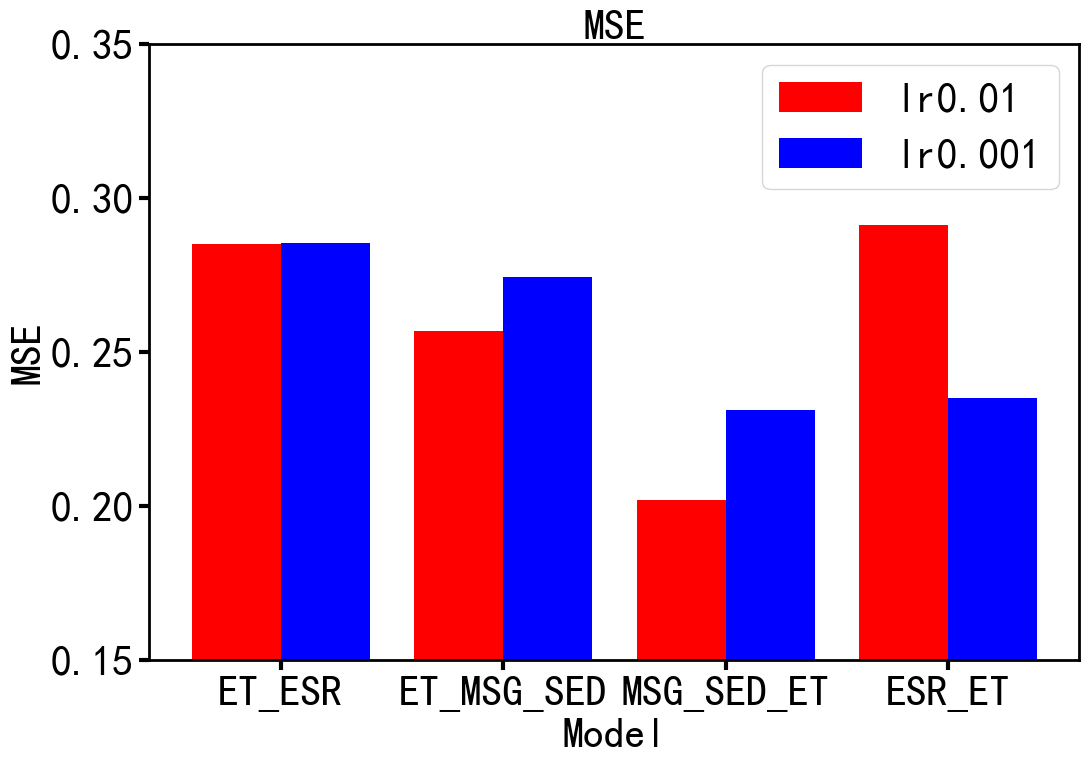

<Figure size 640x480 with 0 Axes>

In [34]:
regressline,ym,yf,yd=Autobar_or_line(np.array(mse),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.35,selfvmin=0.15,linenum=2,xlabelname='Model',ylabelname='MSE',bar_line_title='MSE',label=['lr0.01','lr0.001'],linewidth=4,selfcolor=['r','b'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=30,xlabelformat='self',valuemodel='+')

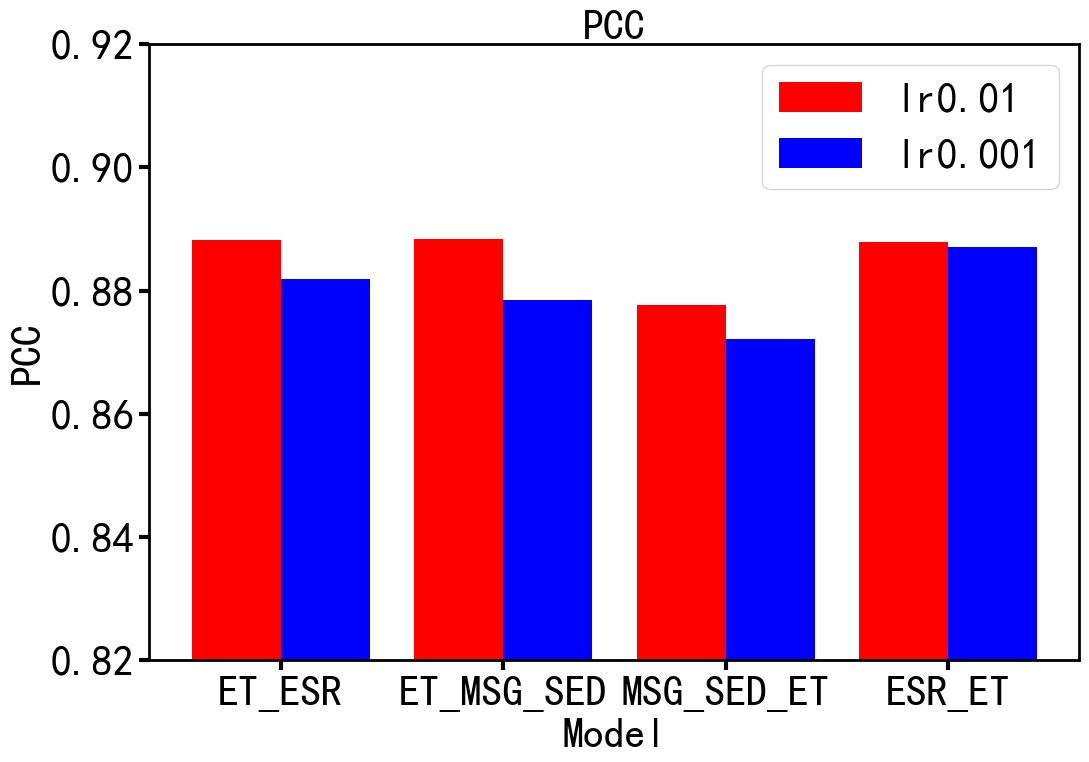

<Figure size 640x480 with 0 Axes>

In [48]:
regressline,ym,yf,yd=Autobar_or_line(np.array(pearson),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.92,selfvmin=0.82,linenum=2,xlabelname='Model',ylabelname='PCC',bar_line_title='PCC',label=['lr0.01','lr0.001'],linewidth=4,selfcolor=['r','b'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=30,xlabelformat='self',valuemodel='+')

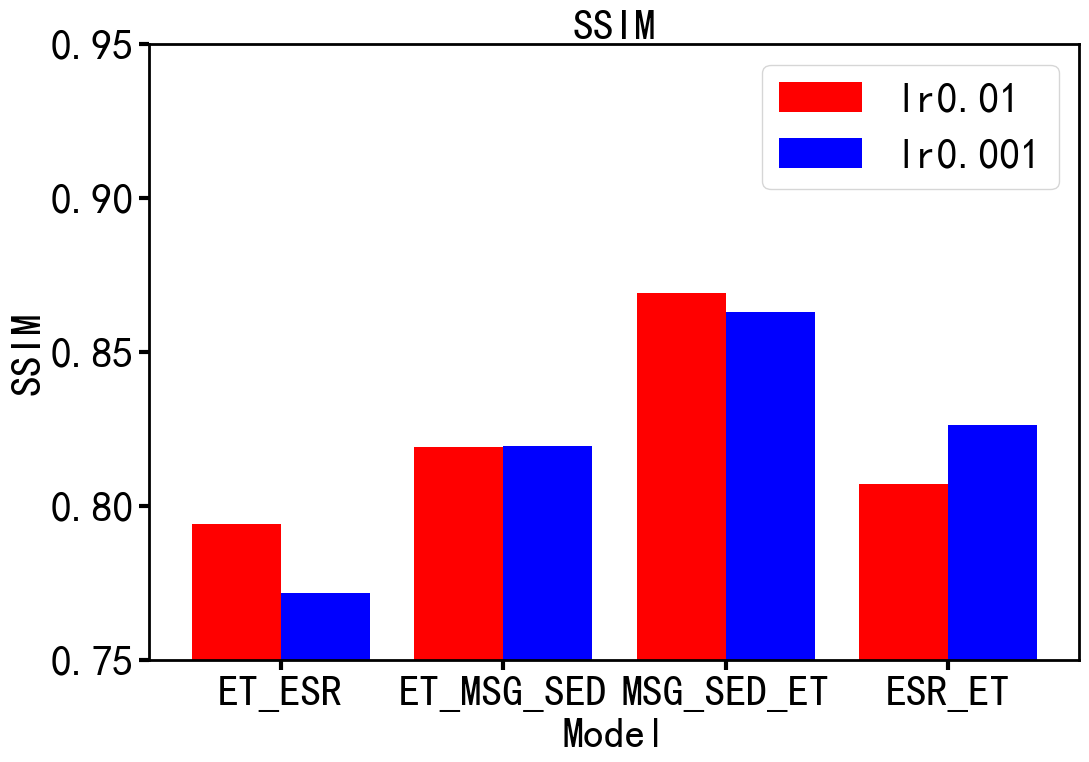

<Figure size 640x480 with 0 Axes>

In [42]:
regressline,ym,yf,yd=Autobar_or_line(np.array(SSIM),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.95,selfvmin=0.75,linenum=2,xlabelname='Model',ylabelname='SSIM',bar_line_title='SSIM',label=['lr0.01','lr0.001'],linewidth=4,selfcolor=['r','b'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=30,xlabelformat='self',valuemodel='+')

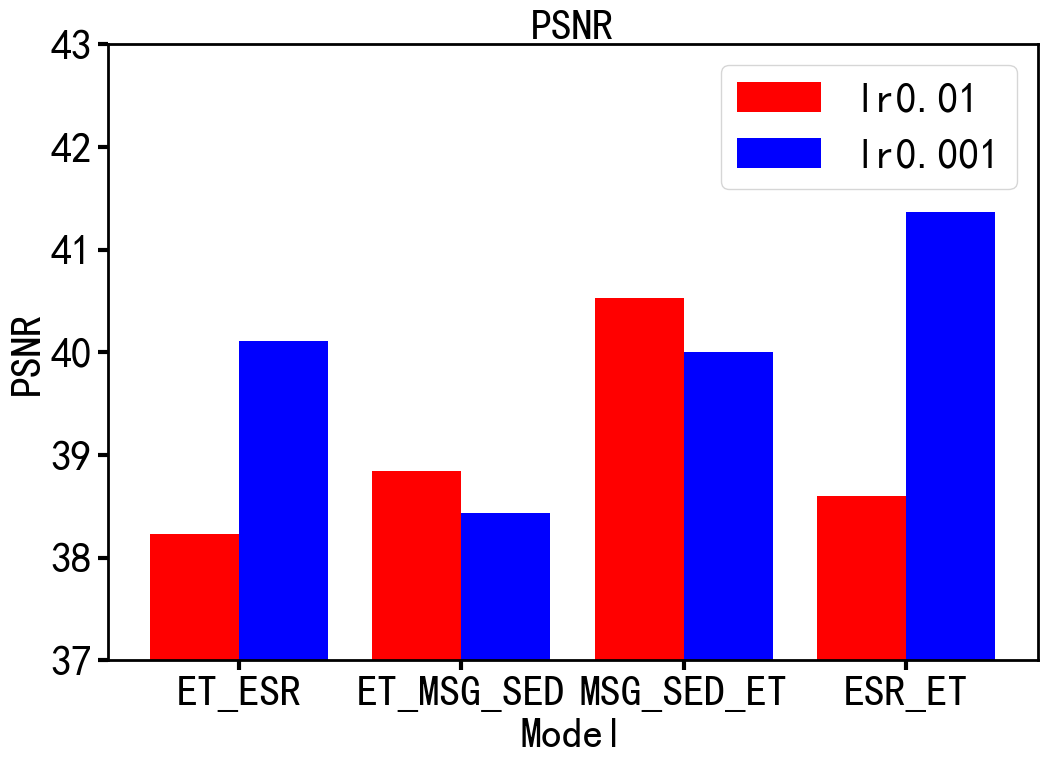

<Figure size 640x480 with 0 Axes>

In [46]:
regressline,ym,yf,yd=Autobar_or_line(np.array(PSNR),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=43,selfvmin=37,linenum=2,xlabelname='Model',ylabelname='PSNR',bar_line_title='PSNR',label=['lr0.01','lr0.001'],linewidth=4,selfcolor=['r','b'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=30,xlabelformat='self',valuemodel='+')

In [3]:
mse3=[0.2019,0.2441,0.2770]
pearson3=[0.8777,0.8767,0.8839]
psnr3=[40.5234,39.8392,41.4616]
ssim3=[0.8692,0.8352,0.8265]
times=['Direct','Indirect','Separate']

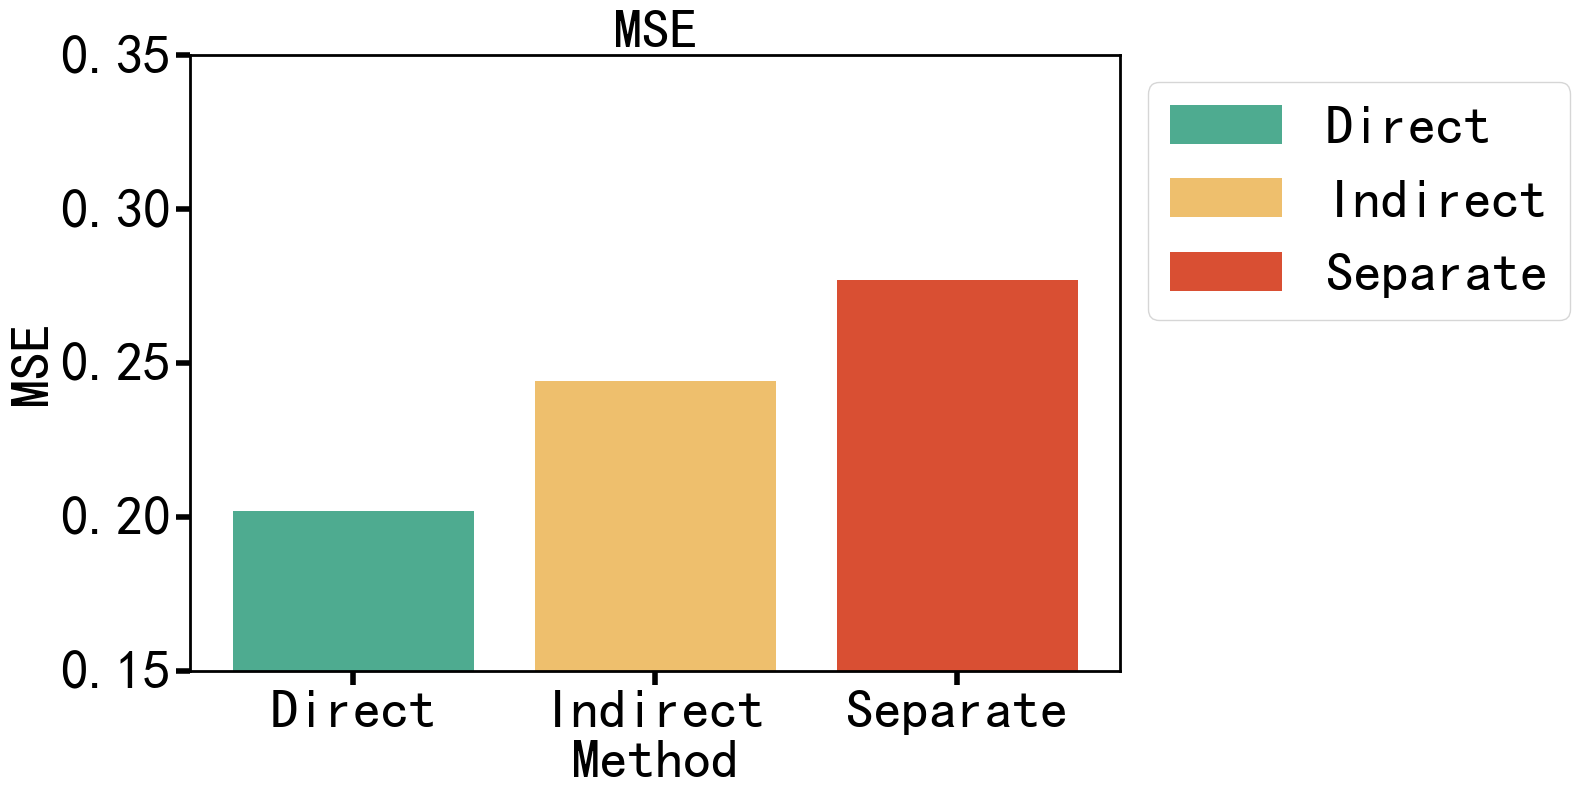

<Figure size 640x480 with 0 Axes>

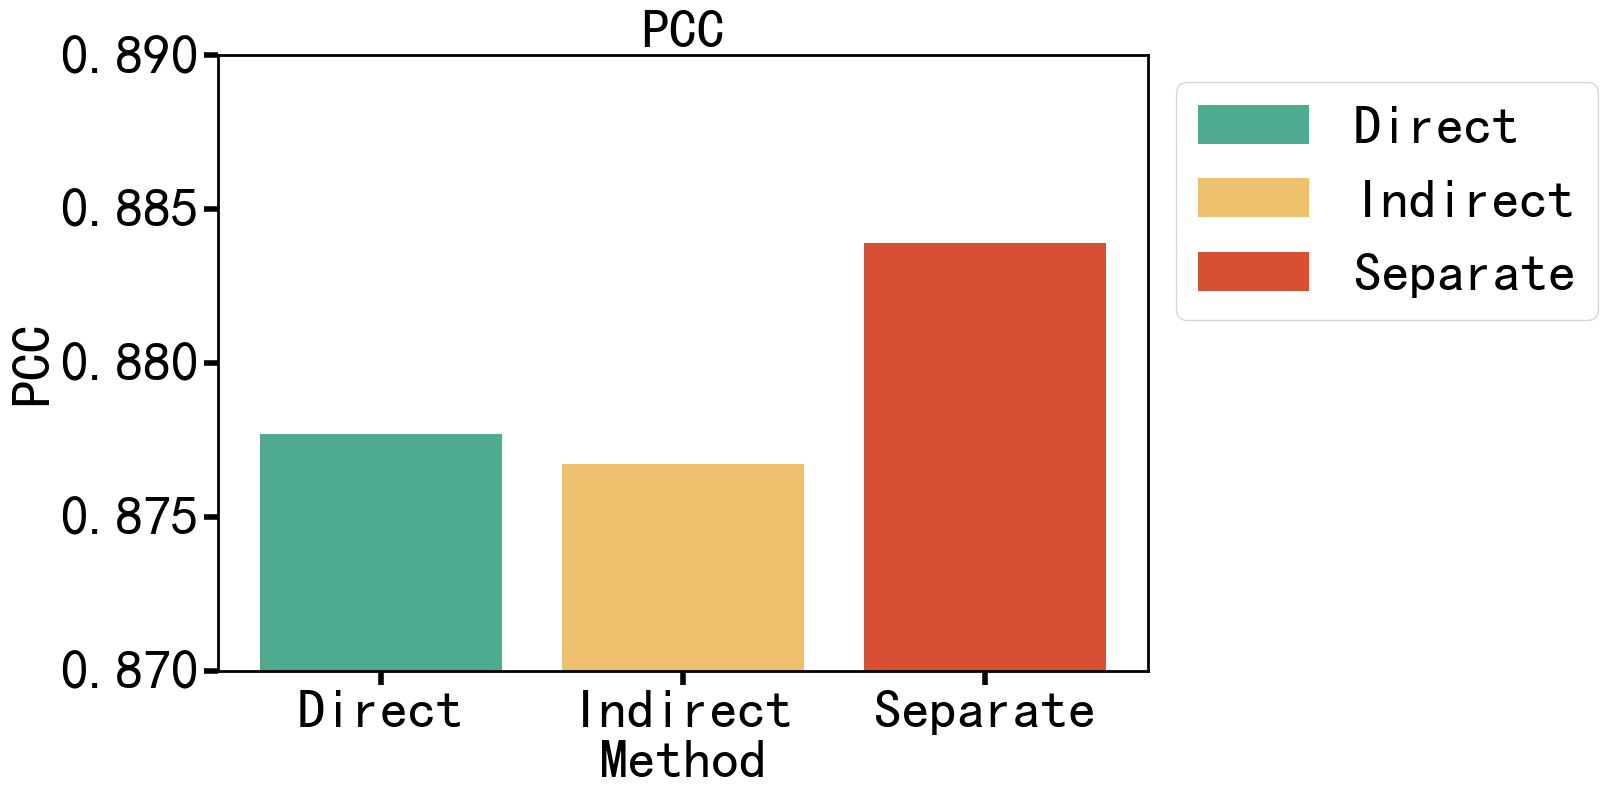

<Figure size 640x480 with 0 Axes>

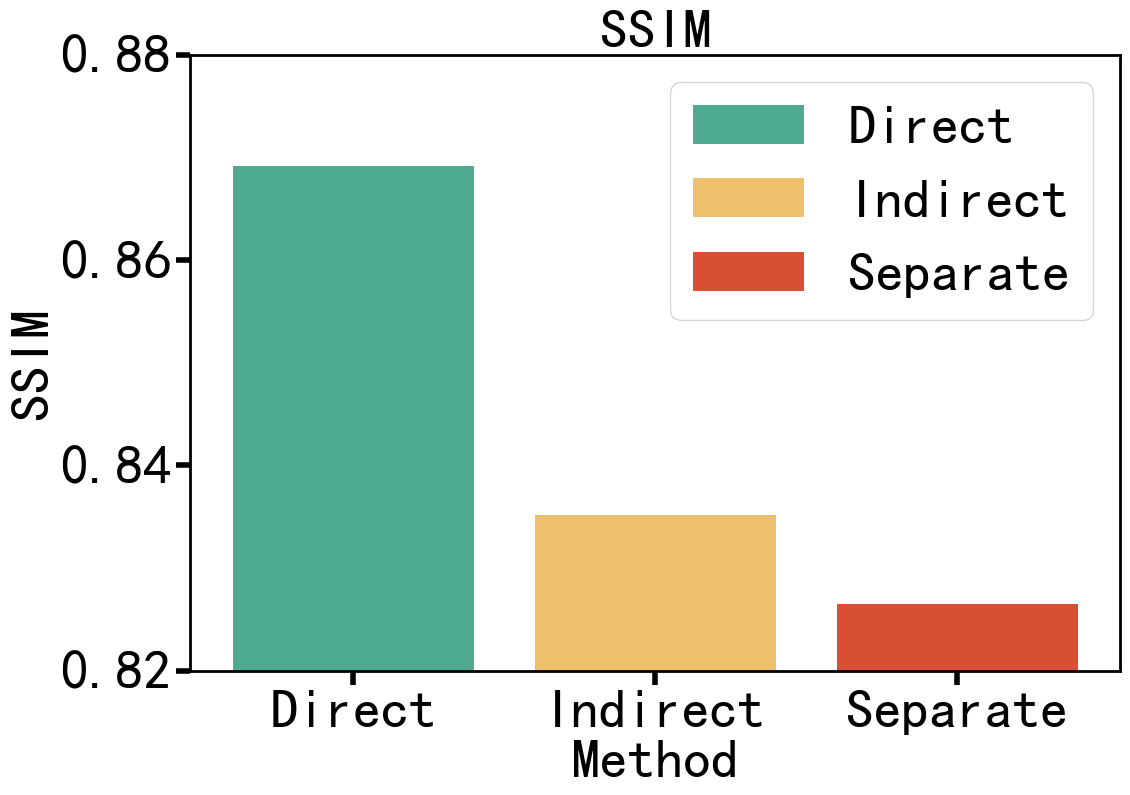

<Figure size 640x480 with 0 Axes>

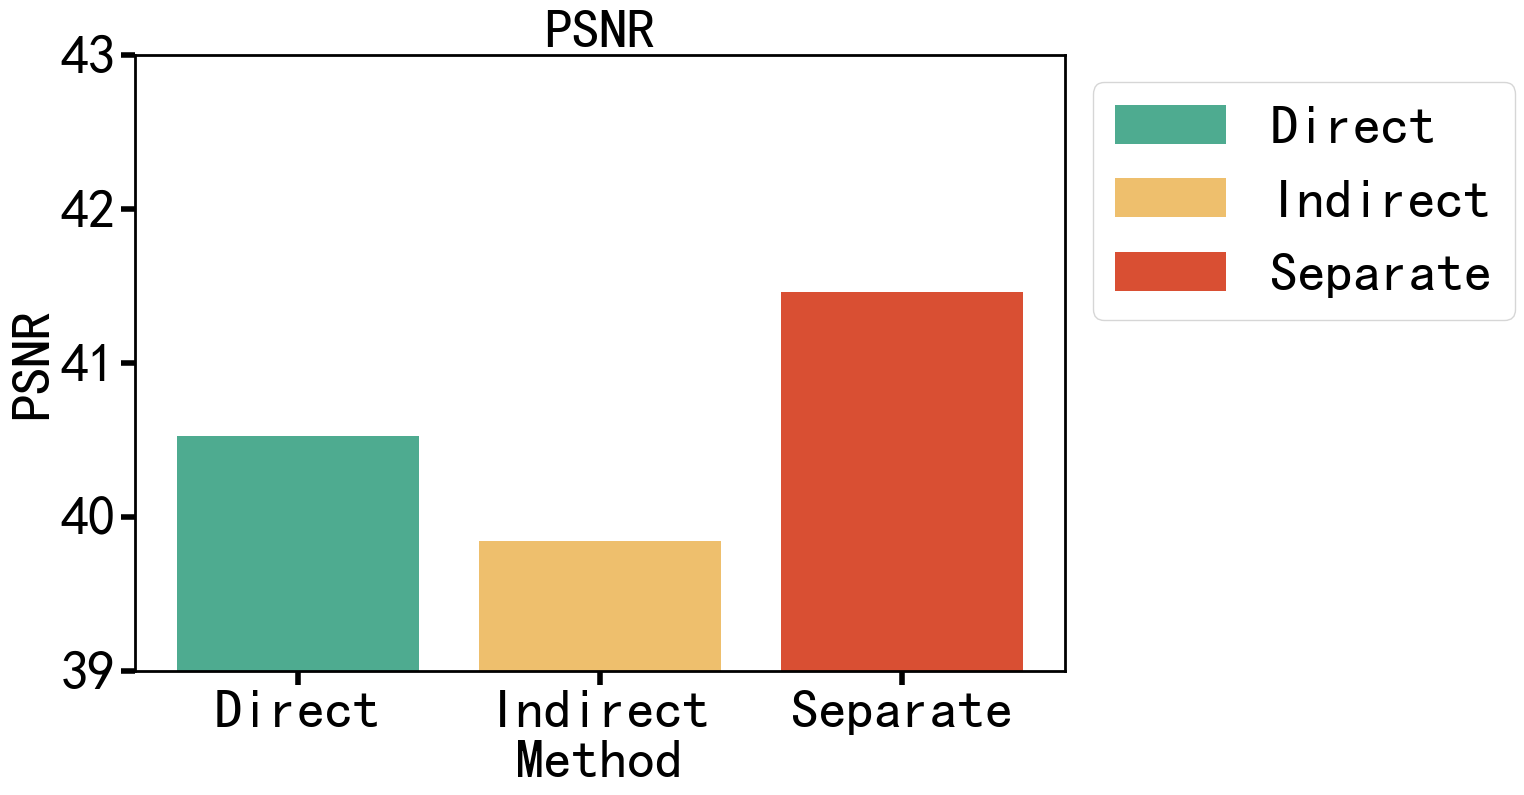

<Figure size 640x480 with 0 Axes>

In [5]:
regressline,ym,yf,yd=Autobar_or_line(np.array(mse3),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.35,selfvmin=0.15,linenum=1,xlabelname='Method',ylabelname='MSE',bar_line_title='MSE',label=['Direct','Indirect','Separate'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(pearson3),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.89,selfvmin=0.87,linenum=1,xlabelname='Method',ylabelname='PCC',bar_line_title='PCC',label=['Direct','Indirect','Separate'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(ssim3),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.88,selfvmin=0.82,linenum=1,xlabelname='Method',ylabelname='SSIM',bar_line_title='SSIM',label=['Direct','Indirect','Separate'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(psnr3),times,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=43,selfvmin=39,linenum=1,xlabelname='Method',ylabelname='PSNR',bar_line_title='PSNR',label=['Direct','Indirect','Separate'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')

In [12]:
mse3_pro=[0.2649,0.1991,0.1768]
pearson3_pro=[0.8807,0.9100,0.9087]
psnr3_pro=[36.6628,38.7443,37.7701]
ssim3_pro=[0.7964,0.8426,0.8393]
times_pro=['Single','Single R','Moreoutput R']

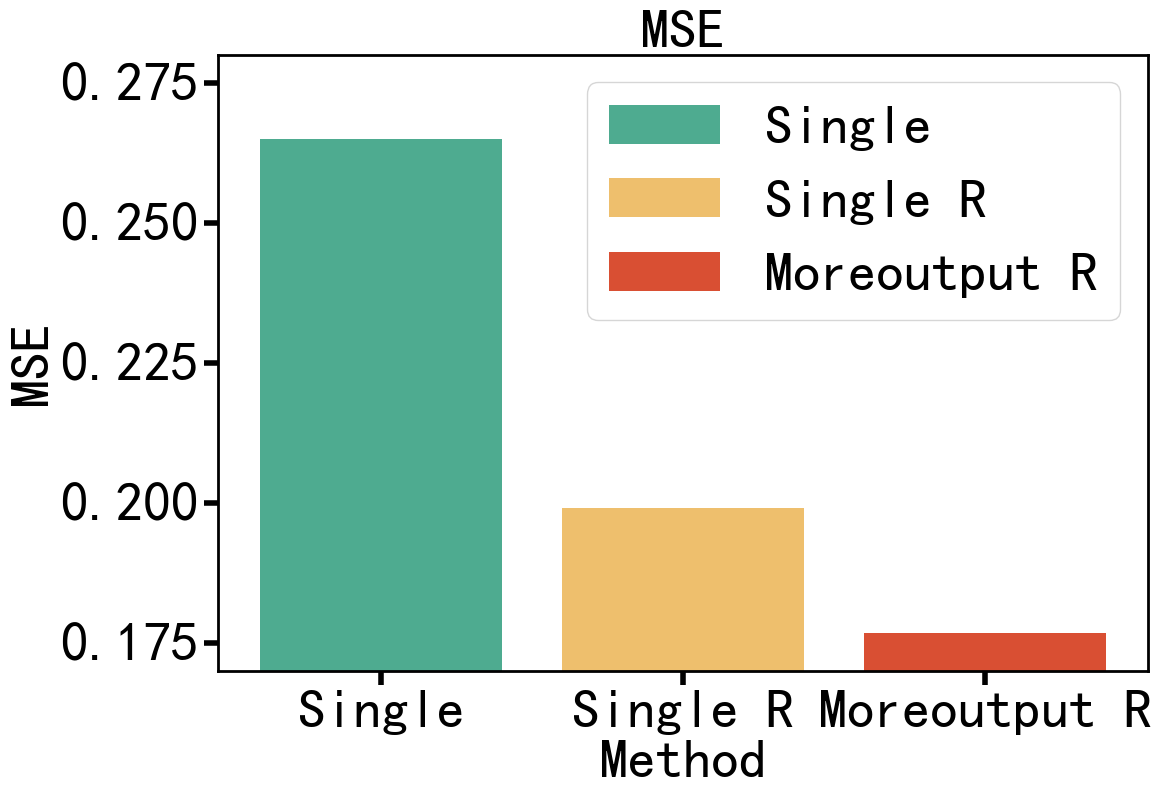

<Figure size 640x480 with 0 Axes>

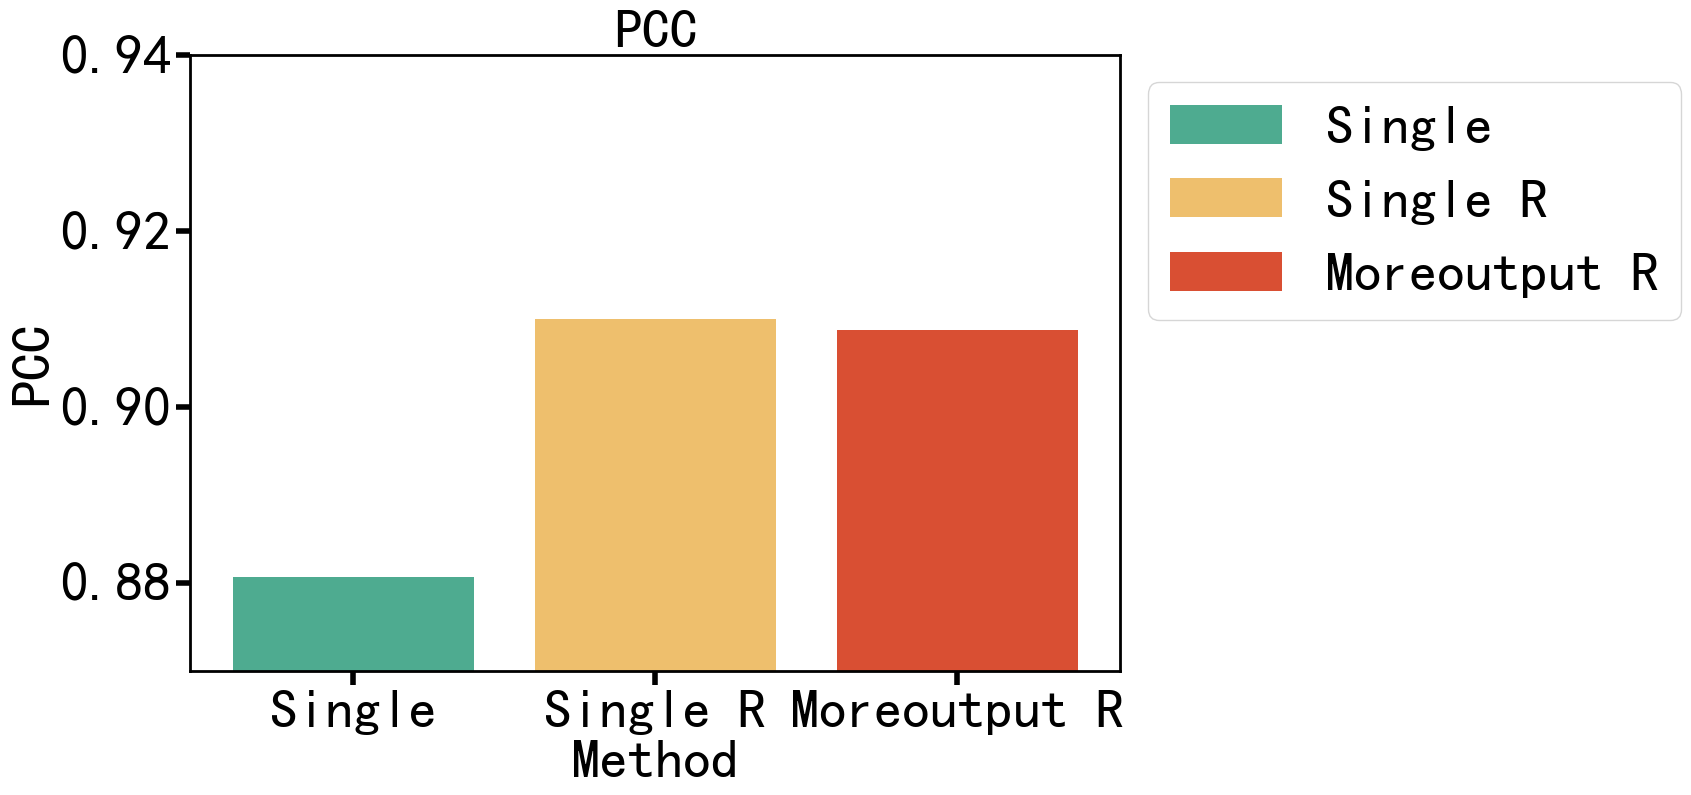

<Figure size 640x480 with 0 Axes>

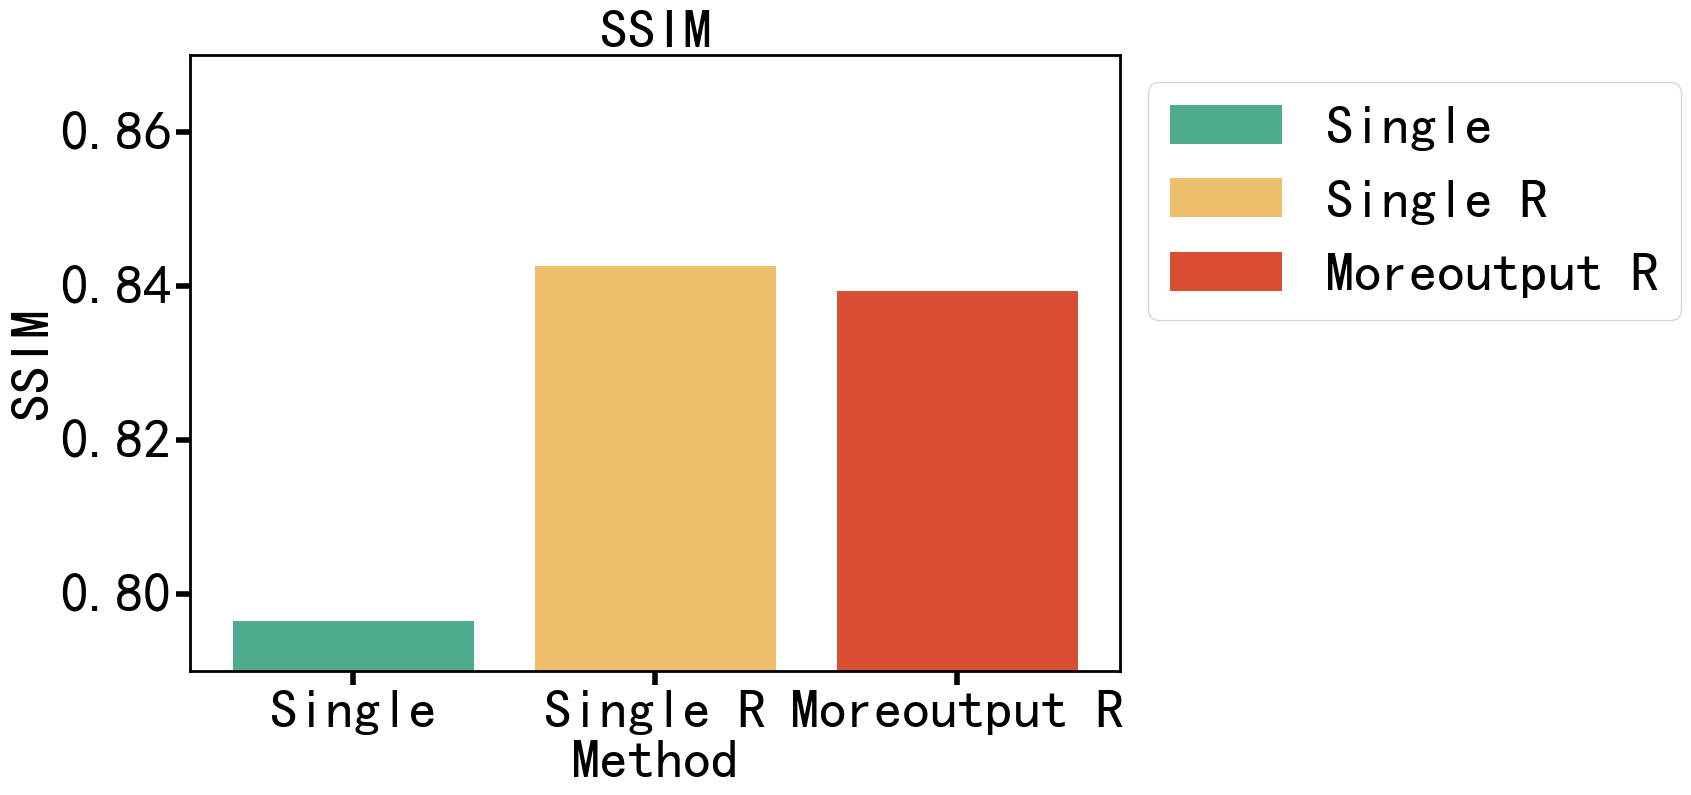

<Figure size 640x480 with 0 Axes>

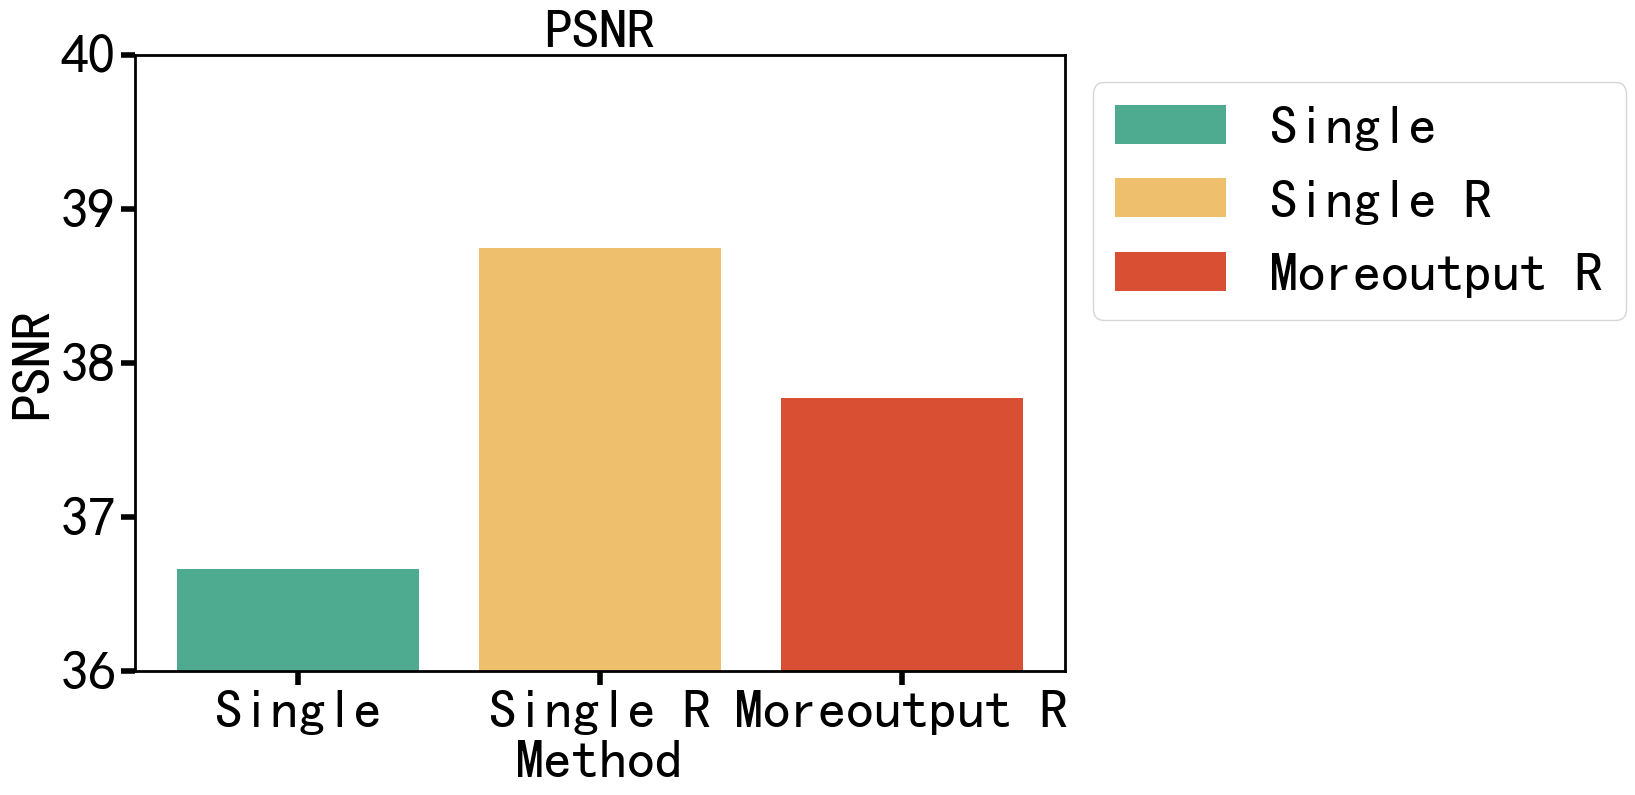

<Figure size 640x480 with 0 Axes>

In [13]:
regressline,ym,yf,yd=Autobar_or_line(np.array(mse3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.28,selfvmin=0.17,linenum=1,xlabelname='Method',ylabelname='MSE',bar_line_title='MSE',label=['Single','Single R','Moreoutput R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(pearson3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.94,selfvmin=0.87,linenum=1,xlabelname='Method',ylabelname='PCC',bar_line_title='PCC',label=['Single','Single R','Moreoutput R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(ssim3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.87,selfvmin=0.79,linenum=1,xlabelname='Method',ylabelname='SSIM',bar_line_title='SSIM',label=['Single','Single R','Moreoutput R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(psnr3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=40,selfvmin=36,linenum=1,xlabelname='Method',ylabelname='PSNR',bar_line_title='PSNR',label=['Single','Single R','Moreoutput R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')

In [14]:
mse3_pro=[0.3769,0.2927,0.2349]
pearson3_pro=[0.8191,0.8593,0.8711]
psnr3_pro=[34.0522,35.3009,36.0748]
ssim3_pro=[0.7254,0.7774,0.7964]
times_pro=['Single','Single R','More Output R']

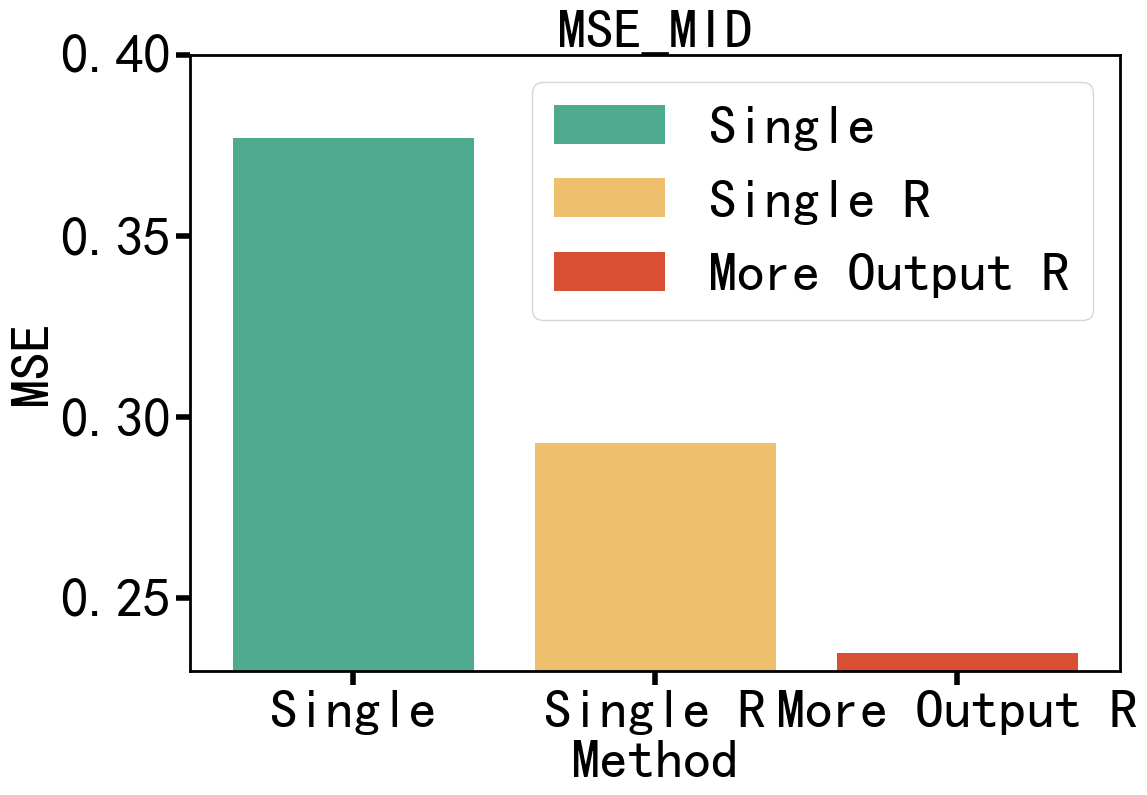

<Figure size 640x480 with 0 Axes>

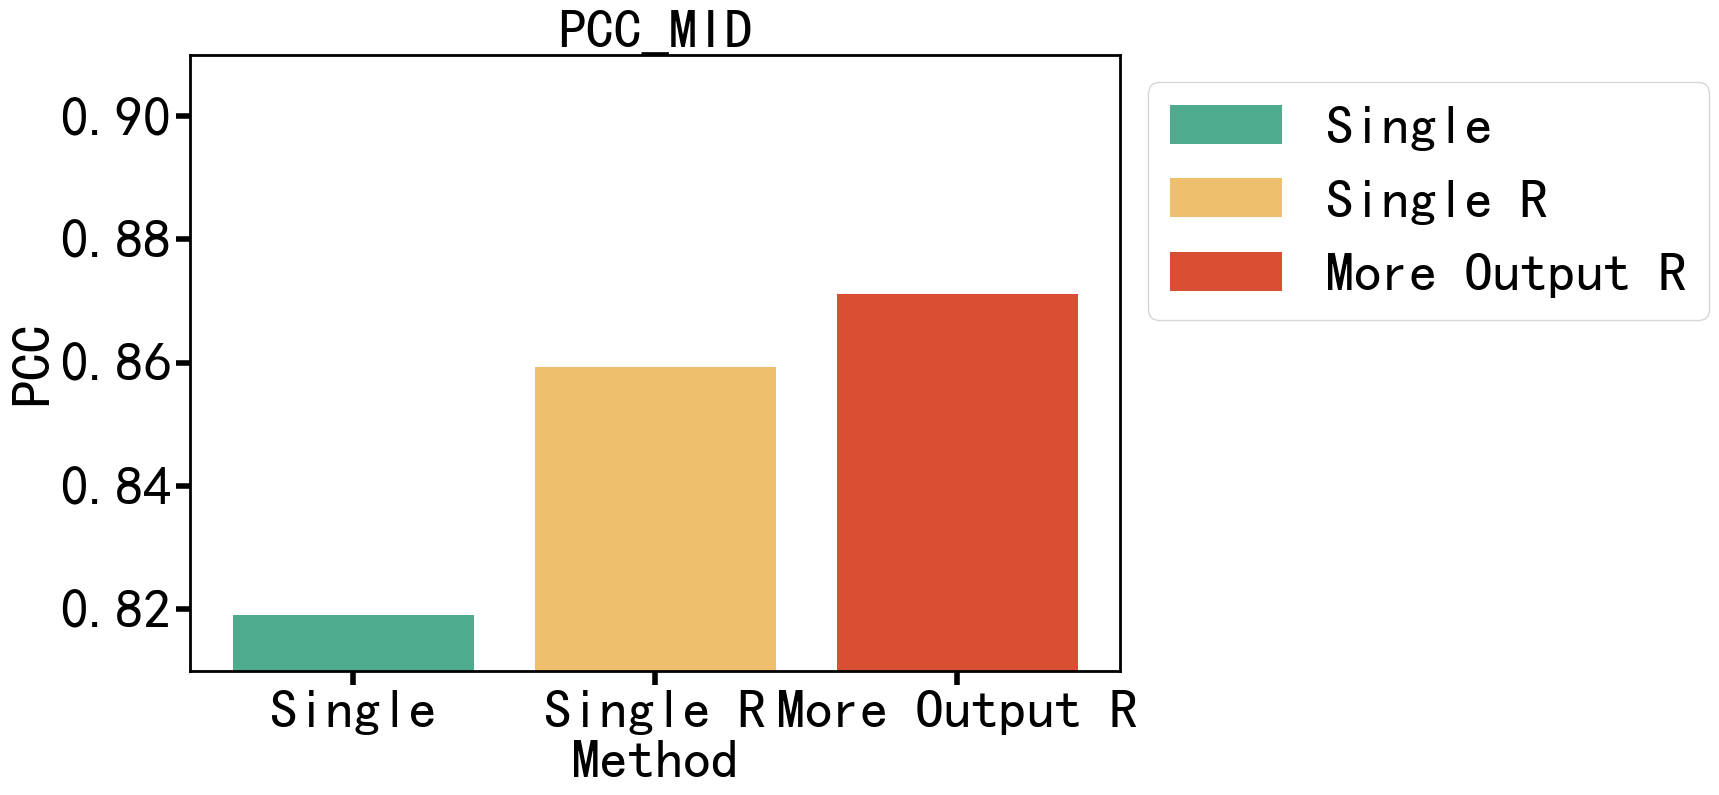

<Figure size 640x480 with 0 Axes>

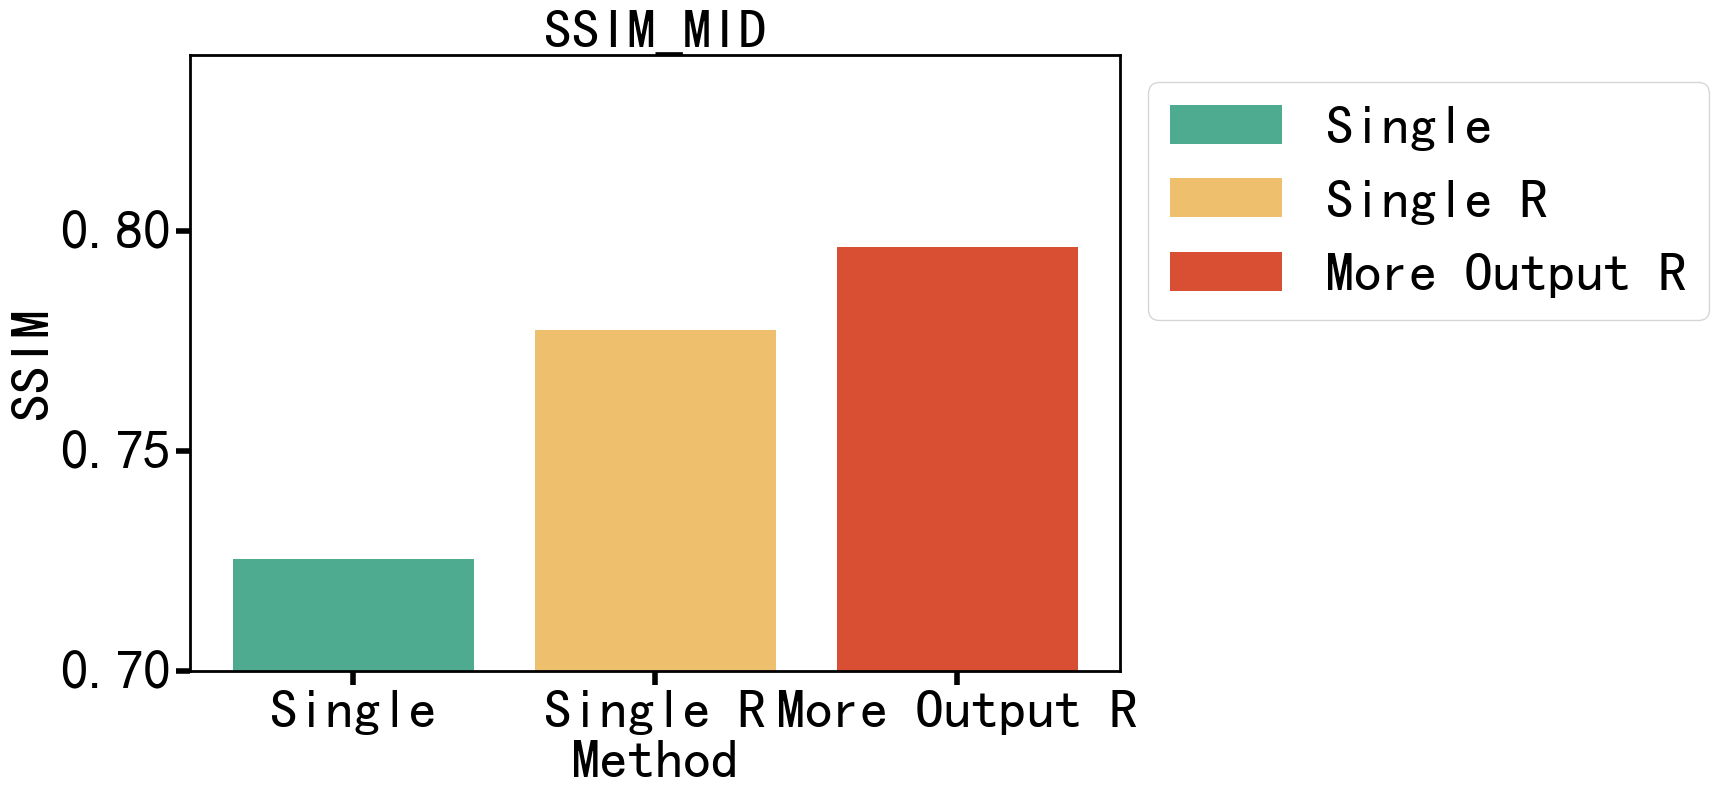

<Figure size 640x480 with 0 Axes>

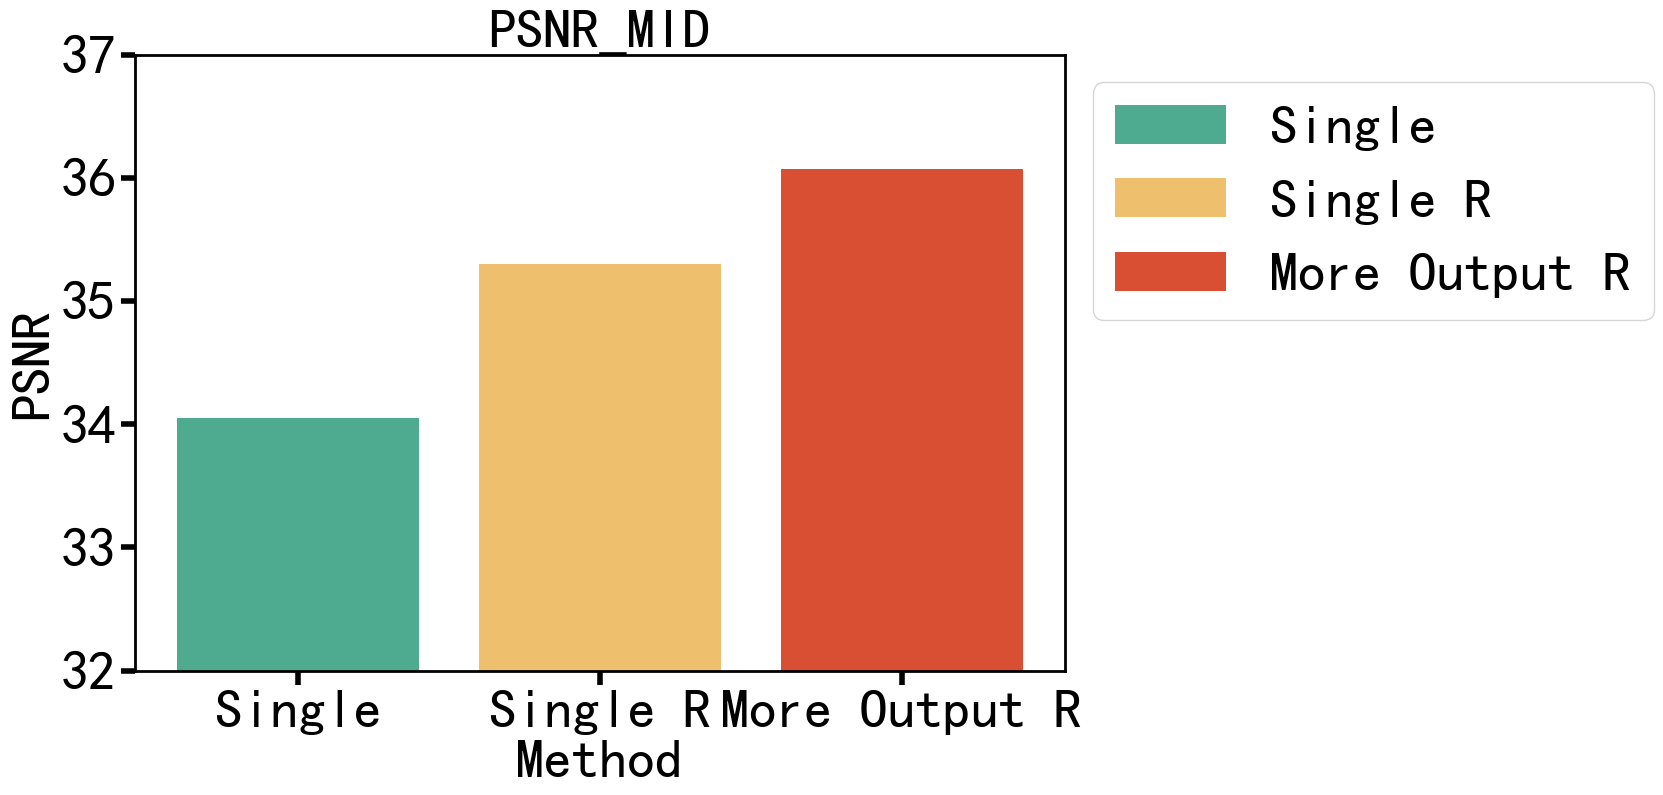

<Figure size 640x480 with 0 Axes>

In [16]:
regressline,ym,yf,yd=Autobar_or_line(np.array(mse3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.40,selfvmin=0.23,linenum=1,xlabelname='Method',ylabelname='MSE',bar_line_title='MSE_MID',label=['Single','Single R','More Output R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(pearson3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.91,selfvmin=0.81,linenum=1,xlabelname='Method',ylabelname='PCC',bar_line_title='PCC_MID',label=['Single','Single R','More Output R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(ssim3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=0.84,selfvmin=0.70,linenum=1,xlabelname='Method',ylabelname='SSIM',bar_line_title='SSIM_MID',label=['Single','Single R','More Output R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')
regressline,ym,yf,yd=Autobar_or_line(np.array(psnr3_pro),times_pro,None,'no',None,None,'no',None,None,'no',None,None,'bar',vs=None,ifself_vmax_vmin='yes',selfvmax=37,selfvmin=32,linenum=1,xlabelname='Method',ylabelname='PSNR',bar_line_title='PSNR_MID',label=['Single','Single R','More Output R'],linewidth=4,selfcolor=['#4EAB90','#EEBF6D','#D94F33'],iftend='no',ifmultitend='no',iffilter='no',filtermode=None,extent=None,rangement=None,ifdetend='no',detendtype=None,ifstdline='no',ifmean='no',xspace=1,labelsize=40,xlabelformat='self',valuemodel='+')